Saved: /Users/asca/Documents/University/Master Thesis/code/Data/VIGO17_NS089008_QPD_0750_20_AS_011_CC/20240620/fig/20240620_132914_Run1_VIGO17_NS089008_QPD_0750_20_AS_011_CC_AmplitudeUniformity.png


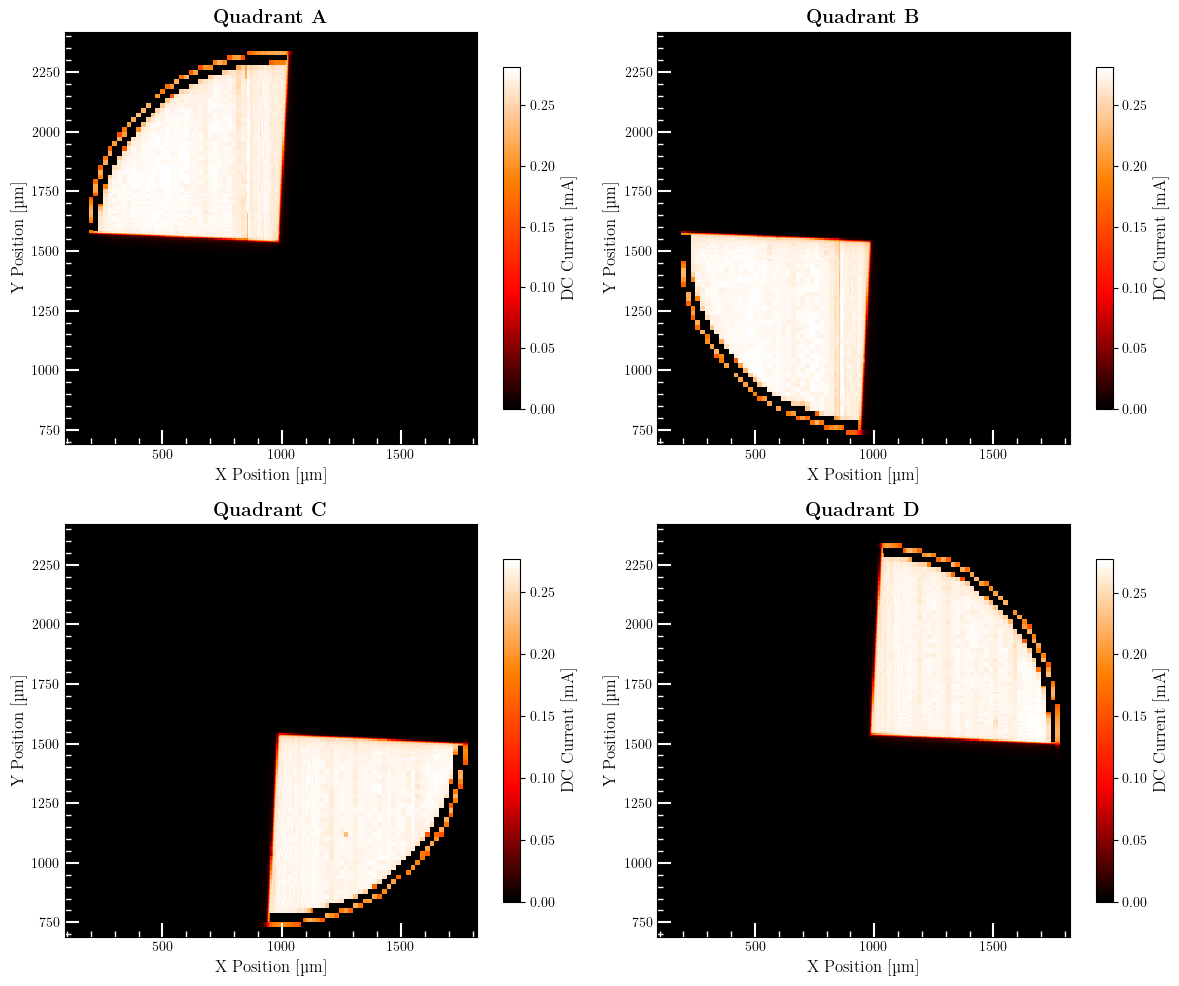

All plots generated and saved successfully.


In [2]:
import pickle
import numpy as np
import os
import glob
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib.colors as mcolors

font_path = "/Users/asca/Library/Fonts/cmunrm.ttf"  
cmu_serif = fm.FontProperties(fname=font_path)
# Ensure LaTeX is in the PATH (done also in shell config) and enable rendering
os.environ['PATH'] += ':/usr/local/texlive/2024/bin/universal-darwin'
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Computer Modern']  

# Data and figure directories
data_dir = "/Users/asca/Documents/University/Master Thesis/code/Data/VIGO17_NS089008_QPD_0750_20_AS_011_CC/20240620"
fig_dir = os.path.join(data_dir, "fig")

# Load .pkl files
file_list = sorted(glob.glob(os.path.join(data_dir, "*.pkl")))

def load_data(file_path):
    with open(file_path, "rb") as file:
        data = pickle.load(file)
    return data.get('rawdata', None)

# Custom colormap
colors = [(0, 0, 0), (1, 0, 0), (1, 0.5, 0), (1, 1, 1)]  # Black -> Red -> Orange -> White
cm = mcolors.LinearSegmentedColormap.from_list("black_red_white", colors, N=100)

def plot_quadrant(ax, x, y, data, title, cm):
    c = ax.pcolormesh(x, y, data, shading='auto', cmap=cm, vmin=0, vmax=np.max(data))
    ax.set_title(rf"\textbf{{{title}}}", fontsize=14) 
    ax.set_xlabel(r"X Position [\textmu{}m]", fontsize=12)
    ax.set_ylabel(r"Y Position [\textmu{}m]", fontsize=12)  
    ax.set_aspect('equal')
    
    x_min, x_max = np.min(x), np.max(x)
    x_ticks = np.arange(max(500, x_min), x_max + 1, 500)
    ax.set_xticks(x_ticks)
    ax.set_xticklabels([f"{int(tick)}" for tick in x_ticks])
    
    y_min, y_max = np.min(y), np.max(y)
    y_ticks = np.arange(max(750, y_min), y_max + 1, 250)
    ax.set_yticks(y_ticks)
    ax.set_yticklabels([f"{int(tick)}" for tick in y_ticks])
    
    ax.tick_params(which='major', direction='in', top=False, right=False, color='white', labelcolor='black', length=10, width=1.5) 
    ax.tick_params(which='minor', direction='in', top=False, right=False, color='white', labelcolor='black', length=4, width=1) 
    ax.minorticks_on()
    ax.grid(False)
    
    cbar = plt.colorbar(c, ax=ax, shrink=0.8)
    cbar.set_label(r"DC Current [mA]", fontsize=12)
    cbar.set_ticks(np.arange(0, 0.26, 0.05))

for file_path in file_list:
    rawdata = load_data(file_path)
    if rawdata is None:
        print(f"Skipping {file_path}, no 'rawdata' found.")
        continue
    
    x_positions = np.array(rawdata['stage_laser_xposition'])
    y_positions = np.array(rawdata['stage_laser_yposition'])
    grid_shape = (len(np.unique(x_positions)), len(np.unique(y_positions)))
    
    try:
        dccurr_A = np.array(rawdata['quadA']['dmm00_curr_amp']).mean(axis=2).flatten().reshape(grid_shape) * 1000
        dccurr_B = np.array(rawdata['quadB']['dmm00_curr_amp']).mean(axis=2).flatten().reshape(grid_shape) * 1000
        dccurr_C = np.array(rawdata['quadC']['dmm00_curr_amp']).mean(axis=2).flatten().reshape(grid_shape) * 1000
        dccurr_D = np.array(rawdata['quadD']['dmm00_curr_amp']).mean(axis=2).flatten().reshape(grid_shape) * 1000
    except ValueError:
        print(f"Skipping {file_path} due to unexpected data shape.")
        continue

    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    plot_quadrant(axes[0, 0], x_positions, y_positions, dccurr_A, "Quadrant A", cm)
    plot_quadrant(axes[0, 1], x_positions, y_positions, dccurr_B, "Quadrant B", cm)
    plot_quadrant(axes[1, 0], x_positions, y_positions, dccurr_C, "Quadrant C", cm)
    plot_quadrant(axes[1, 1], x_positions, y_positions, dccurr_D, "Quadrant D", cm)
    
    filename = os.path.basename(file_path).replace(".pkl", ".png")
    save_path = os.path.join(fig_dir, filename)
    plt.savefig(save_path, dpi=300, bbox_inches='tight', facecolor='white') 
    print(f"Saved: {save_path}")
    plt.tight_layout()
    plt.show()
    plt.close()

print("All plots generated and saved successfully.")

Saved: /Users/asca/Documents/University/Master Thesis/code/Data/VIGO17_NS089008_QPD_0750_20_AS_011_CC/20240620/fig/combined_quadrants.png and /Users/asca/Documents/University/Master Thesis/code/Data/VIGO17_NS089008_QPD_0750_20_AS_011_CC/20240620/fig/combined_quadrants.pdf


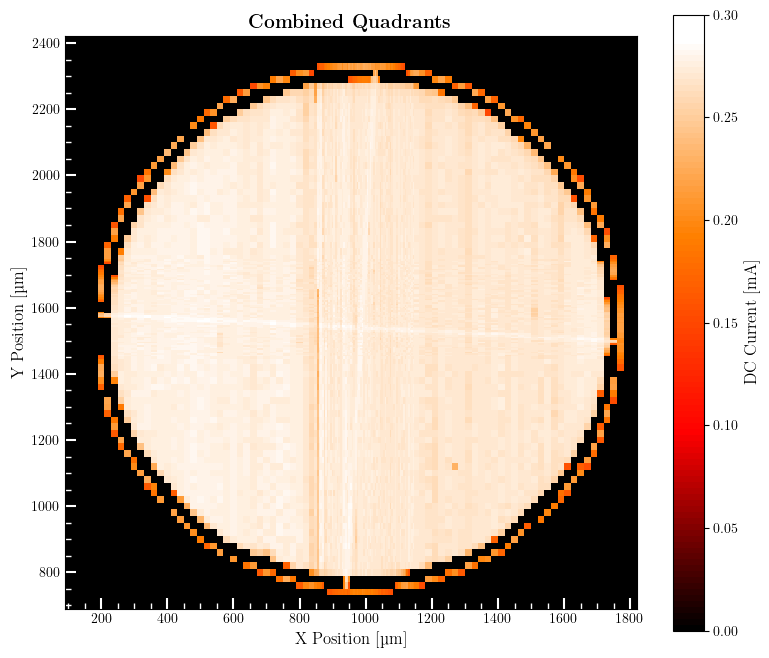

In [3]:
# Sum the current values from all quadrants
combined_current = dccurr_A + dccurr_B + dccurr_C + dccurr_D

# Create a single plot for the combined data
fig, ax = plt.subplots(figsize=(8, 8))

# Plot the combined data
c = ax.pcolormesh(x_positions, y_positions, combined_current, shading='auto', cmap=cm, vmin=0, vmax=np.max(combined_current))
title = "Combined Quadrants"
ax.set_title(rf"\textbf{{{title}}}", fontsize=14) 
ax.set_xlabel(rf"X Position [µm]", fontsize=12)
ax.set_ylabel("Y Position [µm]", fontsize=12)

ax.set_aspect('equal')  

x_min, x_max = np.min(x_positions), np.max(x_positions)
x_ticks = np.arange(max(200, x_min), x_max + 1, 200) 
ax.set_xticks(x_ticks)
ax.set_xticklabels([f"{int(tick)}" for tick in x_ticks])
y_min, y_max = np.min(y_positions), np.max(y_positions)
y_ticks = np.arange(max(800, y_min), y_max + 1, 200) 
ax.set_yticks(y_ticks)
ax.set_yticklabels([f"{int(tick)}" for tick in y_ticks])
ax.tick_params(which='major', direction='in', top=False, right=False, color='white', labelcolor='black', length=8, width=1.5)
ax.tick_params(which='minor', direction='in', top=False, right=False, color='white', labelcolor='black', length=4, width=1)
ax.minorticks_on()
ax.grid(False)

cbar = plt.colorbar(c, ax=ax, shrink=0.8)
cbar.set_label("DC Current [mA]", fontsize=12)
cbar.set_ticks(np.arange(0, np.ceil(np.max(combined_current) * 1.1 / 0.05) * 0.05, 0.05))

filename_base = os.path.join(fig_dir, "combined_quadrants")
plt.savefig(f"{filename_base}.png", dpi=300, bbox_inches='tight', facecolor='white')
plt.savefig(f"{filename_base}.pdf", dpi=300, bbox_inches='tight', facecolor='white')
print(f"Saved: {filename_base}.png and {filename_base}.pdf")

plt.tight_layout()
plt.show()
plt.close()  


Available X values: [ 100.  120.  140.  160.  180.  200.  220.  240.  260.  280.  300.  320.
  340.  360.  380.  400.  420.  440.  460.  480.  500.  520.  540.  560.
  580.  600.  620.  640.  660.  680.  700.  720.  740.  760.  780.  800.
  820.  840.  850.  855.  860.  865.  870.  875.  880.  885.  890.  895.
  900.  905.  910.  915.  920.  925.  930.  935.  940.  945.  950.  955.
  960.  965.  970.  975.  980.  985.  990.  995. 1000. 1005. 1010. 1015.
 1020. 1025. 1030. 1035. 1040. 1045. 1050. 1055. 1060. 1065. 1070. 1075.
 1080. 1085. 1090. 1095. 1100. 1105. 1110. 1115. 1120. 1125. 1130. 1135.
 1140. 1145. 1150. 1170. 1190. 1210. 1230. 1250. 1270. 1290. 1310. 1330.
 1350. 1370. 1390. 1410. 1430. 1450. 1470. 1490. 1510. 1530. 1550. 1570.
 1590. 1610. 1630. 1650. 1670. 1690. 1710. 1730. 1750. 1770. 1790. 1810.]
Using closest X = 1390.0


Saved: /Users/asca/Documents/University/Master Thesis/code/Data/VIGO17_NS089008_QPD_0750_20_AS_011_CC/20240620/fig/slicing/slice_at_X_1390_with_sum_Y1250to1750.png


/var/folders/z2/x35ff22s25jgptbssk4ctryc0000gn/T/ipykernel_4965/555548649.py:102: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


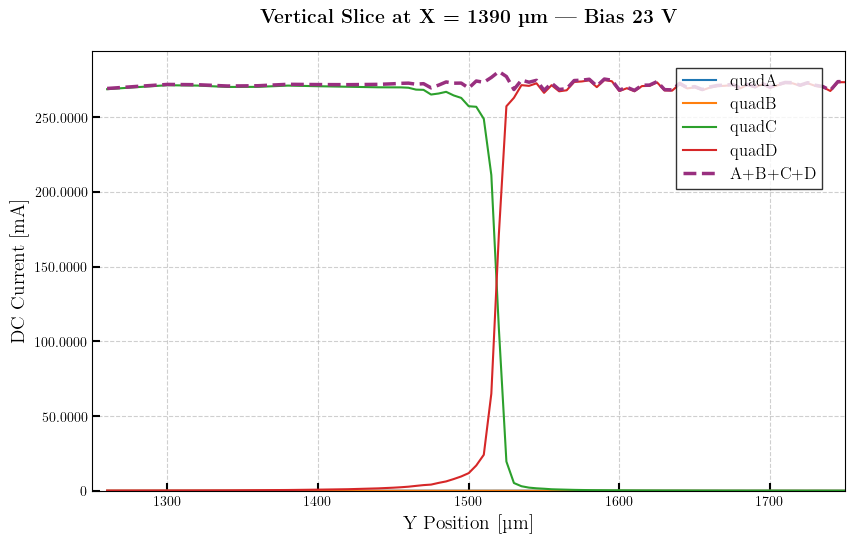

In [4]:
unique_x = np.unique(x_positions)
print("Available X values:", unique_x)
# Set X value closest to desired target
x_target = 1400
tolerance = np.min(np.diff(unique_x)) * 0.5 if len(unique_x) > 1 else 1e-3
x_closest = unique_x[np.argmin(np.abs(unique_x - x_target))]
print(f"Using closest X = {x_closest}")
x_positions_1D = x_positions.flatten()
y_positions_1D = y_positions.flatten()
matching_indices = np.where(np.abs(x_positions_1D - x_closest) < tolerance)[0]
if matching_indices.size == 0:
    raise ValueError(f"No data found near x = {x_target}. Closest available: {x_closest}")

# ====================== RESTRICTED Y-RANGE (set None for full range) ======================
y_min_plot = 1250#None (FOR FULL RANGE)      # e.g. 800
y_max_plot = 1750#None      # e.g. 1200
# ======================================================================================

y_slice = y_positions_1D[matching_indices]
dccurr_A_slice = dccurr_A.flatten()[matching_indices]
dccurr_B_slice = dccurr_B.flatten()[matching_indices]
dccurr_C_slice = dccurr_C.flatten()[matching_indices]
dccurr_D_slice = dccurr_D.flatten()[matching_indices]

sorted_indices = np.argsort(y_slice)
y_slice_sorted           = y_slice[sorted_indices]
dccurr_A_sorted          = dccurr_A_slice[sorted_indices]
dccurr_B_sorted          = dccurr_B_slice[sorted_indices]
dccurr_C_sorted          = dccurr_C_slice[sorted_indices]
dccurr_D_sorted          = dccurr_D_slice[sorted_indices]
dccurr_sum_sorted        = dccurr_A_sorted + dccurr_B_sorted + dccurr_C_sorted + dccurr_D_sorted

# Apply Y restriction if wanted
if y_min_plot is not None or y_max_plot is not None:
    mask = np.ones_like(y_slice_sorted, dtype=bool)
    if y_min_plot is not None:
        mask &= y_slice_sorted >= y_min_plot
    if y_max_plot is not None:
        mask &= y_slice_sorted <= y_max_plot
    y_slice_sorted    = y_slice_sorted[mask]
    dccurr_A_sorted   = dccurr_A_sorted[mask]
    dccurr_B_sorted   = dccurr_B_sorted[mask]
    dccurr_C_sorted   = dccurr_C_sorted[mask]
    dccurr_D_sorted   = dccurr_D_sorted[mask]
    dccurr_sum_sorted = dccurr_sum_sorted[mask]

# Extracting the bias voltage
bias_voltage = rawdata['smu00_bias_volt'][0]
bias_voltage_mean = np.mean(bias_voltage)

# ====================== COSMETICS IDENTICAL TO YOUR HORIZONTAL CODE ======================
import matplotlib.font_manager as fm
from matplotlib.ticker import FuncFormatter

font_path = "/Users/asca/Library/Fonts/cmunrm.ttf"
cmu_serif = fm.FontProperties(fname=font_path)
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Computer Modern']

def y_formatter(val, pos):
    return '0' if val == 0 else f'{val:.4f}'
y_fmt = FuncFormatter(y_formatter)
# ======================================================================================

slicing_dir = "/Users/asca/Documents/University/Master Thesis/code/Data/VIGO17_NS089008_QPD_0750_20_AS_011_CC/20240620/fig/slicing"
os.makedirs(slicing_dir, exist_ok=True)

plt.figure(figsize=(10, 6), layout='constrained')

plt.plot(y_slice_sorted, dccurr_A_sorted*1000, label='quadA', color='tab:blue')
plt.plot(y_slice_sorted, dccurr_B_sorted*1000, label='quadB', color='tab:orange')
plt.plot(y_slice_sorted, dccurr_C_sorted*1000, label='quadC', color='tab:green')
plt.plot(y_slice_sorted, dccurr_D_sorted*1000, label='quadD', color='tab:red')
plt.plot(y_slice_sorted, dccurr_sum_sorted*1000, '--', color="#992f7f", linewidth=2.5, 
         label='A+B+C+D')

plt.grid(True, linestyle='--', alpha=0.6)
plt.xlabel(r"Y Position [\textmu m]", fontsize=14, fontweight='bold')
plt.ylabel(r"DC Current [mA]", fontsize=14, fontweight='bold')
plt.title(rf"\textbf{{Vertical Slice at X = {int(x_closest)} \textmu{{m}} | Bias {int(bias_voltage_mean)} V}}", 
          fontsize=14, fontweight='bold', pad=20)

plt.ylim(bottom=0)
plt.tick_params(axis='both', which='major', labelsize=10, length=6, width=1.5, direction='in')
plt.gca().yaxis.set_major_formatter(y_fmt)

if y_min_plot is not None or y_max_plot is not None:
    plt.xlim(y_min_plot or np.min(y_slice_sorted), y_max_plot or np.max(y_slice_sorted))

plt.legend(fontsize=12, loc='upper right', bbox_to_anchor=(0.98, 0.98),
           frameon=True, fancybox=False, edgecolor='black')

filename = f"slice_at_X_{int(x_closest)}_with_sum"
if y_min_plot is not None or y_max_plot is not None:
    filename += f"_Y{int(y_min_plot or 0)}to{int(y_max_plot or 9999)}"
filename += ".png"

save_path = os.path.join(slicing_dir, filename)
plt.savefig(save_path, dpi=300, bbox_inches='tight', facecolor='white')
print(f"Saved: {save_path}")
plt.tight_layout()
plt.show()

### HORIZONTAL SCANS

Quad A and D

Available Y values: [ 700.  720.  740.  760.  780.  800.  820.  840.  860.  880.  900.  920.
  940.  960.  980. 1000. 1020. 1040. 1060. 1080. 1100. 1120. 1140. 1160.
 1180. 1200. 1220. 1240. 1260. 1280. 1300. 1320. 1340. 1360. 1380. 1400.
 1420. 1440. 1450. 1455. 1460. 1465. 1470. 1475. 1480. 1485. 1490. 1495.
 1500. 1505. 1510. 1515. 1520. 1525. 1530. 1535. 1540. 1545. 1550. 1555.
 1560. 1565. 1570. 1575. 1580. 1585. 1590. 1595. 1600. 1605. 1610. 1615.
 1620. 1625. 1630. 1635. 1640. 1645. 1650. 1655. 1660. 1665. 1670. 1675.
 1680. 1685. 1690. 1695. 1700. 1705. 1710. 1715. 1720. 1725. 1730. 1735.
 1740. 1745. 1750. 1770. 1790. 1810. 1830. 1850. 1870. 1890. 1910. 1930.
 1950. 1970. 1990. 2010. 2030. 2050. 2070. 2090. 2110. 2130. 2150. 2170.
 2190. 2210. 2230. 2250. 2270. 2290. 2310. 2330. 2350. 2370. 2390. 2410.]
Using closest Y = 1990.0
Saved: /Users/asca/Documents/University/Master Thesis/code/Data/VIGO17_NS089008_QPD_0750_20_AS_011_CC/20240620/fig/slicing/DC_Photocurrent_Y1990um_Quad

/var/folders/z2/x35ff22s25jgptbssk4ctryc0000gn/T/ipykernel_4965/2298623510.py:89: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


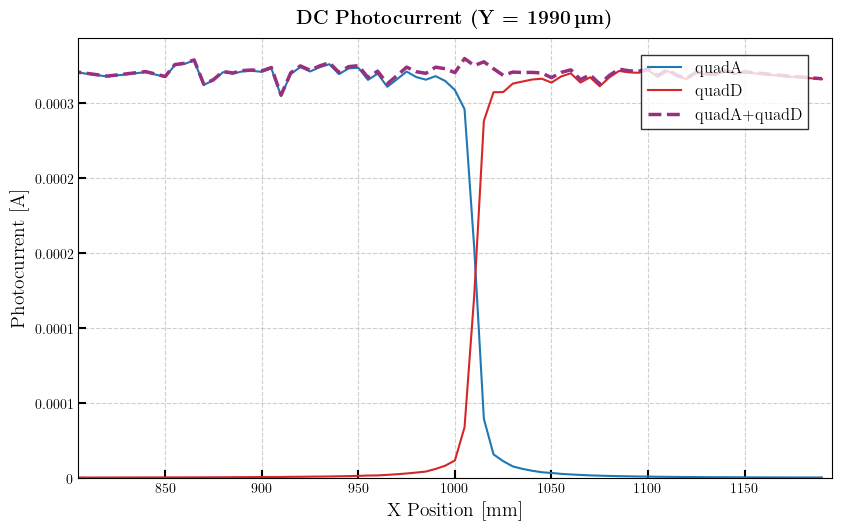

In [5]:
unique_y = np.unique(y_positions)
print("Available Y values:", unique_y)
y_target = 2000
tolerance = np.min(np.diff(unique_y)) * 0.5 if len(unique_y) > 1 else 1e-3
y_closest = unique_y[np.argmin(np.abs(unique_y - y_target))]
print(f"Using closest Y = {y_closest}")

x_positions_1D = x_positions.flatten()
y_positions_1D = y_positions.flatten()
matching_indices = np.where(np.abs(y_positions_1D - y_closest) < tolerance)[0]
if matching_indices.size == 0:
    raise ValueError(f"No data found near y = {y_target}. Closest available: {y_closest}")

# ====================== RESTRICTED X-RANGE ======================
x_min_plot = 800
x_max_plot = 1200
# ======================================================================================
x_slice = x_positions_1D[matching_indices]
dccurr_A_slice = dccurr_A.flatten()[matching_indices]
dccurr_B_slice = dccurr_B.flatten()[matching_indices]
dccurr_C_slice = dccurr_C.flatten()[matching_indices]
dccurr_D_slice = dccurr_D.flatten()[matching_indices]
sorted_indices = np.argsort(x_slice)
x_slice_sorted = x_slice[sorted_indices]
dccurr_A_sorted = dccurr_A_slice[sorted_indices]
dccurr_B_sorted = dccurr_B_slice[sorted_indices]
dccurr_C_sorted = dccurr_C_slice[sorted_indices]
dccurr_D_sorted = dccurr_D_slice[sorted_indices]
dccurr_sum_sorted = dccurr_A_sorted + dccurr_D_sorted  # Only A + D

if x_min_plot is not None or x_max_plot is not None:
    mask = np.ones_like(x_slice_sorted, dtype=bool)
    if x_min_plot is not None:
        mask &= x_slice_sorted >= x_min_plot
    if x_max_plot is not None:
        mask &= x_slice_sorted <= x_max_plot
    x_slice_sorted = x_slice_sorted[mask]
    dccurr_A_sorted = dccurr_A_sorted[mask]
    dccurr_D_sorted = dccurr_D_sorted[mask]
    dccurr_sum_sorted = dccurr_sum_sorted[mask]

import matplotlib.font_manager as fm
from matplotlib.ticker import FuncFormatter
font_path = "/Users/asca/Library/Fonts/cmunrm.ttf"
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Computer Modern']
def y_formatter(val, pos):
    return '0' if val == 0 else f'{val:.4f}'
y_fmt = FuncFormatter(y_formatter)

slicing_dir = "/Users/asca/Documents/University/Master Thesis/code/Data/VIGO17_NS089008_QPD_0750_20_AS_011_CC/20240620/fig/slicing"
os.makedirs(slicing_dir, exist_ok=True)

plt.figure(figsize=(10, 6), layout='constrained')

dccurr_A_A = dccurr_A_sorted * 1e-3
dccurr_D_A = dccurr_D_sorted * 1e-3
dccurr_sum_A = dccurr_sum_sorted * 1e-3

plt.plot(x_slice_sorted, dccurr_A_A, label='quadA', color='tab:blue')
plt.plot(x_slice_sorted, dccurr_D_A, label='quadD', color='tab:red')
plt.plot(x_slice_sorted, dccurr_sum_A, '--', color="#992f7f", linewidth=2.5,
         label='quadA+quadD')

plt.grid(True, linestyle='--', alpha=0.6)
plt.xlabel(r"X Position [mm]", fontsize=14, fontweight='bold')
plt.ylabel(r"Photocurrent [A]", fontsize=14, fontweight='bold')
plt.title(rf"\textbf{{DC Photocurrent (Y = {int(y_closest)}\,\textmu{{m}})}}",
          fontsize=14, fontweight='bold', pad=10)

plt.ylim(bottom=0)
plt.tick_params(axis='both', which='major', labelsize=10, length=6, width=1.5, direction='in')
plt.gca().yaxis.set_major_formatter(y_fmt)

padding = 5
plt.xlim(x_min_plot + padding, x_max_plot - padding)

plt.legend(fontsize=12, loc='upper right', bbox_to_anchor=(0.98, 0.98),
           frameon=True, fancybox=False, edgecolor='black')

filename = f"DC_Photocurrent_Y{int(y_closest):04d}um_Quadrants_AD"
if x_min_plot is not None or x_max_plot is not None:
    filename += f"_X{int(x_min_plot)}to{int(x_max_plot)}"
filename += ".png"
save_path = os.path.join(slicing_dir, filename)
plt.savefig(save_path, dpi=300, bbox_inches='tight', facecolor='white')
print(f"Saved: {save_path}")
plt.tight_layout()
plt.show()

### Y = 1990um (AD)


=== GAP SENSITIVITY @ Y = 1990 µm ===
Left plateau (A+D): 275.111 µA
Right plateau (A+D): 267.987 µA
Mean plateau : 271.549 µA
Maximum in gap : 279.905 µA @ X = 1005.0 mm
→ Overshoot : +3.08 %

→ FINAL PLOT SAVED WITH PERFECT STYLE → /Users/asca/Documents/University/Master Thesis/code/Data/VIGO17_NS089008_QPD_0750_20_AS_011_CC/20240620/fig_final/DC_Photocurrent_Y1990um_Quadrants_AD.png


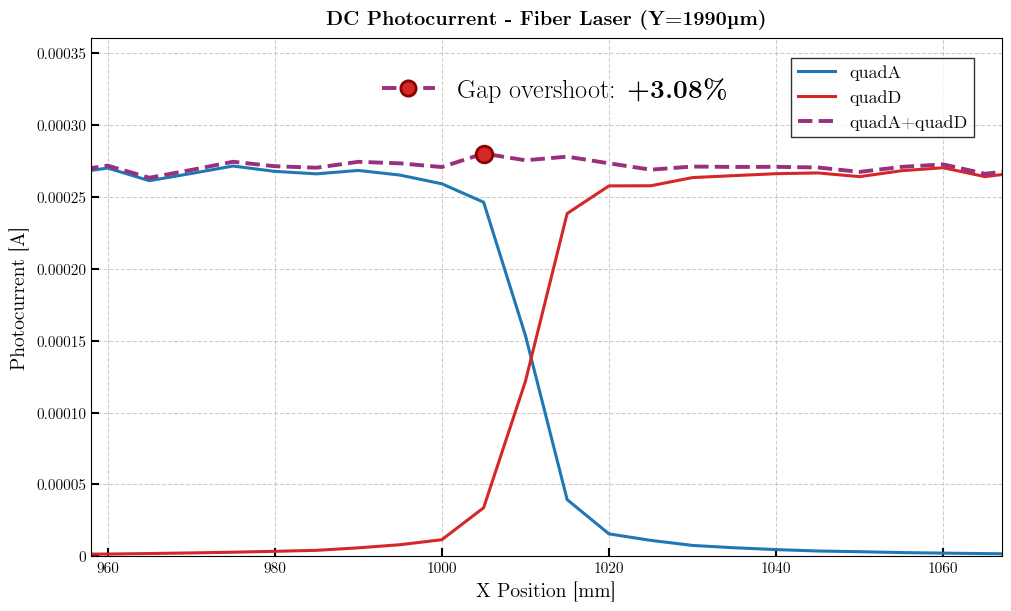

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from matplotlib.lines import Line2D
import matplotlib.font_manager as fm

# ------------------- USER PARAMETERS -------------------
y_target = 2000
x_min_plot = 950
x_max_plot = 1075
gap_region = (950, 1050)
left_region = (x_min_plot, gap_region[0])
right_region = (gap_region[1], x_max_plot)

# ------------------- FONT SETUP -------------------
cm_regular_path = "/Users/asca/Library/Fonts/cmunrm.ttf"   # Regular
cm_bold_path    = "/Users/asca/Library/Fonts/cmunbx.ttf"   # BOLD 

# Add both fonts to Matplotlib
fm.fontManager.addfont(cm_regular_path)
fm.fontManager.addfont(cm_bold_path)

# Create FontProperties
prop_regular = fm.FontProperties(fname=cm_regular_path)
prop_bold    = fm.FontProperties(fname=cm_bold_path, weight='bold')


plt.rcParams.update({
    'text.usetex': False,
    'font.family': 'serif',
    'font.serif': ['CMU Serif'],
    'font.weight': 'normal',
    'mathtext.fontset': 'cm',
})

# ------------------- CUSTOM Y FORMATTER -------------------
def y_formatter(val, pos):
    return '0' if val == 0 else f'{val:.5f}'
y_fmt = FuncFormatter(y_formatter)

# ===================== FIND CLOSEST Y SLICE =====================
unique_y = np.unique(y_positions)
tolerance = np.min(np.diff(unique_y)) * 0.5 if len(unique_y) > 1 else 1e-3
y_closest = unique_y[np.argmin(np.abs(unique_y - y_target))]

x_1D = x_positions.flatten()
y_1D = y_positions.flatten()
idx = np.abs(y_1D - y_closest) < tolerance
x_slice = x_1D[idx]
A_slice = dccurr_A.flatten()[idx]      # in Ampere
D_slice = dccurr_D.flatten()[idx]      # in Ampere

# ←←←←←←←←←←  CONVERT TO AMPERES HERE  ←←←←←←←←←←
A_slice = A_slice * 1e-3    # mA → A
D_slice = D_slice * 1e-3    # mA → A

sort_idx = np.argsort(x_slice)
x_s = x_slice[sort_idx]
A_s = A_slice[sort_idx]                 # [A]
D_s = D_slice[sort_idx]                # [A]
sum_s = A_s + D_s

# Apply X limits
mask = (x_s >= x_min_plot) & (x_s <= x_max_plot)
x_s, A_s, D_s, sum_s = x_s[mask], A_s[mask], D_s[mask], sum_s[mask]

# ===================== GAP OVERSHOOT CALCULATION =====================
l_mask = (x_s >= left_region[0]) & (x_s <= left_region[1])
r_mask = (x_s >= right_region[0]) & (x_s <= right_region[1])
g_mask = (x_s >= gap_region[0]) & (x_s <= gap_region[1])

mean_left = np.mean(sum_s[l_mask]) if np.any(l_mask) else 0
mean_right = np.mean(sum_s[r_mask]) if np.any(r_mask) else 0
mean_plateaus = (mean_left + mean_right) / 2.0
max_in_gap = np.max(sum_s[g_mask]) if np.any(g_mask) else 0
x_at_max = x_s[g_mask][np.argmax(sum_s[g_mask])] if np.any(g_mask) else np.mean(x_s)
overshoot_percent = (max_in_gap / mean_plateaus - 1.0) * 100.0 if mean_plateaus > 0 else 0

print(f"\n=== GAP SENSITIVITY @ Y = {int(y_closest)} µm ===")
print(f"Left plateau (A+D): {mean_left*1e6:.3f} µA")
print(f"Right plateau (A+D): {mean_right*1e6:.3f} µA")
print(f"Mean plateau : {mean_plateaus*1e6:.3f} µA")
print(f"Maximum in gap : {max_in_gap*1e6:.3f} µA @ X = {x_at_max:.1f} mm")
print(f"→ Overshoot : {overshoot_percent:+.2f} %\n")

# ========================== PLOT ==========================
plt.close('all')
fig, ax = plt.subplots(figsize=(10, 6), layout='constrained')

# Main traces
ax.plot(x_s, A_s, label='quadA', color='tab:blue', lw=2.2)
ax.plot(x_s, D_s, label='quadD', color='tab:red', lw=2.2)
line_sum = ax.plot(x_s, sum_s, '--', color="#992f7f", lw=2.8, label='quadA+quadD')[0]

# Red marker at maximum in gap
ax.plot(x_at_max, max_in_gap, 'o', color='#d62728', mec='darkred', mew=2, ms=12, zorder=10)

title_prop = fm.FontProperties(fname=cm_bold_path, weight='bold', size=14)
ax.set_title(f"DC Photocurrent - Fiber Laser (Y={int(y_closest)}µm)",
             fontproperties=title_prop, pad=10, loc='center')
ax.set_xlabel("X Position [mm]", fontsize=14, fontweight='bold')
ax.set_ylabel("Photocurrent [A]", fontsize=14, fontweight='bold')
ax.grid(True, linestyle='--', alpha=0.6)
ax.tick_params(axis='both', which='major', labelsize=11, length=6, width=1.5, direction='in')
ax.yaxis.set_major_formatter(y_fmt)
ax.set_ylim(bottom=0, top=0.00036)
ax.set_xlim(x_min_plot + 8, x_max_plot - 8)

# ===================== RESULT BOX  =====================
inset = ax.inset_axes([0.32, 0.82, 0.38, 0.16], transform=ax.transAxes)
inset.axis('off')

# Custom legend handle: dashed purple line + red circle marker
custom_handle = Line2D([0], [0],
                       color="#992f7f", lw=2.8, ls='--',
                       marker='o', markerfacecolor='#d62728',
                       markeredgecolor='darkred', markeredgewidth=2,
                       markersize=11)

'''inset.legend(handles=[custom_handle],
             labels=[rf'Gap overshoot: \textbf{{{overshoot_percent:+.2f}\%}}'],
             loc='center', fontsize=19, frameon=False,
             handletextpad=0.9, handlelength=2.0)'''
with plt.rc_context({'text.usetex': True}):          # temporarily turn LaTeX ON
    inset.legend(handles=[custom_handle],
                 labels=[rf'Gap overshoot: \textbf{{{overshoot_percent:+.2f}\%}}'],
                 loc='center', fontsize=19, frameon=False,
                 handletextpad=0.9, handlelength=2.0)

# ===================== LEGEND =====================
ax.legend(fontsize=13, loc='upper right', bbox_to_anchor=(0.98, 0.98),
          frameon=True, fancybox=False, edgecolor='black')

# ===================== SAVE TO fig_final =====================
base_save_dir = "/Users/asca/Documents/University/Master Thesis/code/Data/VIGO17_NS089008_QPD_0750_20_AS_011_CC/20240620"
final_dir = os.path.join(base_save_dir, "fig_final")
os.makedirs(final_dir, exist_ok=True)

filename = f"DC_Photocurrent_Y{int(y_closest):04d}um_Quadrants_AD.png"
save_path = os.path.join(final_dir, filename)

with plt.rc_context({
    'text.usetex': False,
    'font.family': 'serif',
    'font.serif': ['CMU Serif'],
    'mathtext.fontset': 'cm'
}):
    fig.savefig(save_path, dpi=400, bbox_inches='tight', facecolor='white')

print(f"→ FINAL PLOT SAVED WITH PERFECT STYLE → {save_path}")
plt.show()


=== GAP SENSITIVITY @ Y = 1990 µm ===
Mean plateau : 269.377 µA
Gap Extremum : 279.905 µA @ X = 1005.0 mm
→ Gap Sensitivity (GS) : +3.91 %

→ FINAL PLOT SAVED → /Users/asca/Documents/University/Master Thesis/code/Data/VIGO17_NS089008_QPD_0750_20_AS_011_CC/20240620/fig_final/DC_Photocurrent_Y1990um_Quadrants_AD.png


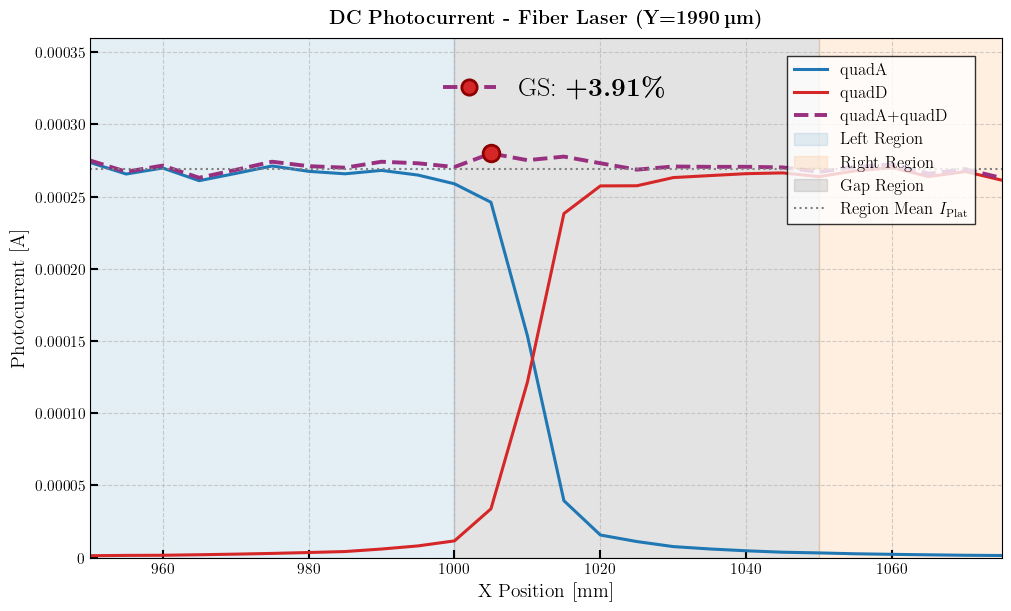

→ GAP SENSITIVITY RESULTS APPENDED/SAVED TO → /Users/asca/Documents/University/Master Thesis/code/AS_011_CC/Fiber Laser/statistical study/HorizontalScan_GapSensitivity_Results.csv
 Y_position_um     X_scan_type     GS_%  Max_in_gap_µA  Mean_plateau_µA
          1990 Horizontal (AD) 3.908385     279.904882       269.376606


In [11]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from matplotlib.lines import Line2D
import matplotlib.font_manager as fm
import pandas as pd
import pickle

# ===================== [ 0 ] ASSUMED DATA LOAD (UNCOMMENT AND ADJUST IF NEEDED) =====================
# This block assumes you have already loaded your data arrays into memory.
# Example data loading (uncomment and adjust path/keys if your data is not loaded):
# data_path = "/path/to/your/data.pkl"
# with open(data_path, "rb") as f:
#     data = pickle.load(f)
# x_positions = data['x_positions']
# y_positions = data['y_positions']
# dccurr_A = data['dccurr_A']
# dccurr_D = data['dccurr_D']


# ===================== [ 1 ] USER PARAMETERS & DIRECTORIES =====================
y_target = 2000          # Target Y position for 1D slice
x_min_plot = 950         # Plotting minimum X
x_max_plot = 1075        # Plotting maximum X

# Gap and Plateau Region Definitions (X positions in mm)
gap_region = (1000, 1050)
left_region = (x_min_plot, gap_region[0])
right_region = (gap_region[1], x_max_plot)

# Output Directories
STAT_DIR = "/Users/asca/Documents/University/Master Thesis/code/AS_011_CC/Fiber Laser/statistical study"
# Ensure the directory exists
os.makedirs(STAT_DIR, exist_ok=True)
base_save_dir = "/Users/asca/Documents/University/Master Thesis/code/Data/VIGO17_NS089008_QPD_0750_20_AS_011_CC/20240620"
final_dir = os.path.join(base_save_dir, "fig_final")
os.makedirs(final_dir, exist_ok=True)


# ===================== [ 2 ] FONT & PLOT SETUP =====================
cm_regular_path = "/Users/asca/Library/Fonts/cmunrm.ttf"   # Regular
cm_bold_path    = "/Users/asca/Library/Fonts/cmunbx.ttf"   # BOLD 
fm.fontManager.addfont(cm_regular_path)
fm.fontManager.addfont(cm_bold_path)

plt.rcParams.update({
    'text.usetex': True, # Use LaTeX for optimal text rendering
    'font.family': 'serif',
    'font.serif': ['Computer Modern'],
    'font.weight': 'normal',
    'mathtext.fontset': 'cm',
})

def y_formatter(val, pos):
    """Formats y-axis to show up to 5 decimal places or '0'."""
    return '0' if abs(val) < 1e-12 else f'{val:.5f}'
y_fmt = FuncFormatter(y_formatter)


# ===================== [ 3 ] DATA SLICING & PROCESSING =====================
# Find Closest Y Slice
unique_y = np.unique(y_positions)
tolerance = np.min(np.diff(unique_y)) * 0.5 if len(unique_y) > 1 else 1e-3
y_closest = unique_y[np.argmin(np.abs(unique_y - y_target))]

x_1D = x_positions.flatten()
y_1D = y_positions.flatten()
idx = np.abs(y_1D - y_closest) < tolerance

x_slice = x_1D[idx]
A_slice = dccurr_A.flatten()[idx] * 1e-3 # Convert mA → A
D_slice = dccurr_D.flatten()[idx] * 1e-3 # Convert mA → A

sort_idx = np.argsort(x_slice)
x_s = x_slice[sort_idx]
A_s = A_slice[sort_idx]
D_s = D_slice[sort_idx]
sum_s = A_s + D_s

# Apply X limits
mask = (x_s >= x_min_plot) & (x_s <= x_max_plot)
x_s, A_s, D_s, sum_s = x_s[mask], A_s[mask], D_s[mask], sum_s[mask]

# Gap Sensitivity Calculation
l_mask = (x_s >= left_region[0]) & (x_s <= left_region[1])
r_mask = (x_s >= right_region[0]) & (x_s <= right_region[1])
g_mask = (x_s >= gap_region[0]) & (x_s <= gap_region[1])

mean_left = np.mean(sum_s[l_mask]) if np.any(l_mask) else 0
mean_right = np.mean(sum_s[r_mask]) if np.any(r_mask) else 0
mean_plateaus = (mean_left + mean_right) / 2.0

if np.any(g_mask):
    max_in_gap = np.max(sum_s[g_mask])
    min_in_gap = np.min(sum_s[g_mask]) # Added for full GS calculation
    x_at_ext = x_s[g_mask][np.argmax(sum_s[g_mask])]
    
    overshoot_percent = (max_in_gap / mean_plateaus - 1.0) * 100.0
    undershoot_percent = (min_in_gap / mean_plateaus - 1.0) * 100.0
    
    # Gap Sensitivity (GS) is the largest magnitude deviation
    if abs(overshoot_percent) >= abs(undershoot_percent):
        gs_val = overshoot_percent
        val_ext = max_in_gap
        x_at_ext = x_s[g_mask][np.argmax(sum_s[g_mask])]
    else:
        gs_val = undershoot_percent
        val_ext = min_in_gap
        x_at_ext = x_s[g_mask][np.argmin(sum_s[g_mask])]
    
else:
    gs_val, val_ext, x_at_ext, mean_plateaus = 0.0, 0.0, np.mean(x_s), 0.0


print(f"\n=== GAP SENSITIVITY @ Y = {int(y_closest)} µm ===")
print(f"Mean plateau : {mean_plateaus*1e6:.3f} µA")
print(f"Gap Extremum : {val_ext*1e6:.3f} µA @ X = {x_at_ext:.1f} mm")
print(f"→ Gap Sensitivity (GS) : {gs_val:+.2f} %\n")


# ===================== [ 4 ] PLOT GENERATION =====================
plt.close('all')
fig, ax = plt.subplots(figsize=(10, 6), layout='constrained')

# --- Region Highlighting (NEW) ---
ax.axvspan(left_region[0], left_region[1], alpha=0.12, color='tab:blue',   label=r'Left Region')
ax.axvspan(right_region[0], right_region[1], alpha=0.12, color='tab:orange', label=r'Right Region')
ax.axvspan(gap_region[0], gap_region[1], alpha=0.22, color='gray',       label=r'Gap Region')

# --- Main Traces ---
ax.plot(x_s, A_s, label='quadA', color='tab:blue', lw=2.2)
ax.plot(x_s, D_s, label='quadD', color='tab:red', lw=2.2)
line_sum = ax.plot(x_s, sum_s, '--', color="#992f7f", lw=2.8, label='quadA+quadD')[0]
ax.axhline(mean_plateaus, color='gray', ls=':', lw=1.5, label=r'Region Mean $I_{\rm{Plat}}$') # Mean Plateau Line

# --- Extremum Marker (Updated color based on GS sign) ---
marker_color = '#d62728' if gs_val >= 0 else '#1f77b4' # Red for overshoot, Blue for undershoot
mec_color = 'darkred' if gs_val >= 0 else 'darkblue'

ax.plot(x_at_ext, val_ext, 'o', color=marker_color, 
        mec=mec_color, mew=2, ms=12, zorder=10)

# --- Title and Labels ---
ax.set_title(rf"\textbf{{DC Photocurrent - Fiber Laser (Y={int(y_closest)}\,\textmu{{m}})}}",
             fontsize=14, fontweight='bold', pad=10, loc='center')
ax.set_xlabel(r'X Position [mm]', fontsize=14)
ax.set_ylabel(r'Photocurrent [A]', fontsize=14)
ax.grid(True, linestyle='--', alpha=0.6)
ax.tick_params(axis='both', which='major', labelsize=11, length=6, width=1.5, direction='in')
ax.yaxis.set_major_formatter(y_fmt)
ax.set_ylim(bottom=0, top=0.00036)
ax.set_xlim(x_min_plot, x_max_plot)

# --- Result Box (Inset) ---
inset = ax.inset_axes([0.32, 0.82, 0.38, 0.16], transform=ax.transAxes)
inset.axis('off')

# Custom legend handle
custom_handle = Line2D([0], [0],
                       color="#992f7f", lw=2.8, ls='--',
                       marker='o', markerfacecolor=marker_color,
                       markeredgecolor=mec_color, markeredgewidth=2,
                       markersize=11)

# Simplified GS label (using GS instead of overshoot/undershoot)
inset.legend(handles=[custom_handle],
             labels=[rf'GS: \textbf{{{gs_val:+.2f}\%}}'],
             loc='center', fontsize=19, frameon=False,
             handletextpad=0.9, handlelength=2.0)

# --- Legend Ordering (Single Column) ---
lines1, labels1 = ax.get_legend_handles_labels()
combined_handles = lines1
combined_labels = labels1

preferred_order = [
    'quadA', 'quadD', 'quadA+quadD',
    r'Left Region', r'Right Region', r'Gap Region', r'Region Mean $I_{\rm{Plat}}$',
]

label_to_handle = {}
for h, l in zip(combined_handles, combined_labels):
    if l not in label_to_handle:
        label_to_handle[l] = h

final_handles = []
final_labels = []
for label in preferred_order:
    if label in label_to_handle:
        final_handles.append(label_to_handle[label])
        final_labels.append(label)

ax.legend(final_handles, final_labels,
          fontsize=12, loc='upper right', bbox_to_anchor=(0.98, 0.98),
          frameon=True, fancybox=False, edgecolor='black', ncol=1)


# ===================== [ 5 ] SAVE PLOT AND CSV =====================
# Save Plot
filename = f"DC_Photocurrent_Y{int(y_closest):04d}um_Quadrants_AD.png"
save_path = os.path.join(final_dir, filename)

fig.savefig(save_path, dpi=400, bbox_inches='tight', facecolor='white')
print(f"→ FINAL PLOT SAVED → {save_path}")
plt.show()

# Save CSV Data (NEW)
csv_filename = "HorizontalScan_GapSensitivity_Results.csv"
csv_path = os.path.join(STAT_DIR, csv_filename)

results = {
    'Y_position_um': [int(y_closest)],
    'X_scan_type': ['Horizontal (AD)'],
    'GS_%': [gs_val],
    'Max_in_gap_µA': [val_ext * 1e6],
    'Mean_plateau_µA': [mean_plateaus * 1e6]
}
df_results = pd.DataFrame(results)

# If the file exists, append without header; otherwise, create new file
if os.path.exists(csv_path):
    df_results.to_csv(csv_path, mode='a', header=False, index=False, float_format='%.3f')
else:
    df_results.to_csv(csv_path, index=False, float_format='%.3f')

print(f"→ GAP SENSITIVITY RESULTS APPENDED/SAVED TO → {csv_path}")
print(df_results.to_string(index=False))


=== GAP SENSITIVITY @ Y = 1990 µm (Quadrants A+D) ===
Mean plateau : 269.377 µA
Gap Extremum : 279.905 µA @ X = 1005.0 mm
→ Gap Sensitivity (GS) : +3.91 %



python(9700) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9701) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


→ FINAL PLOT SAVED → /Users/asca/Documents/University/Master Thesis/code/Data/VIGO17_NS089008_QPD_0750_20_AS_011_CC/20240620/fig_final/DC_Photocurrent_Y1990um_Quadrants_AD.png


python(9702) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


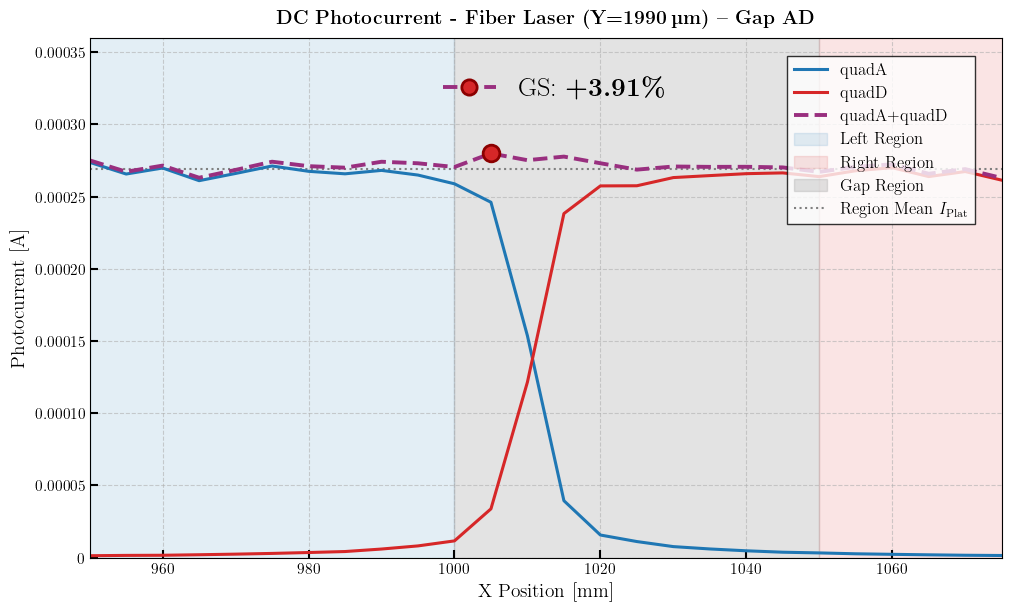

→ GAP SENSITIVITY RESULTS APPENDED/SAVED TO → /Users/asca/Documents/University/Master Thesis/code/AS_011_CC/Fiber Laser/statistical study/HorizontalScan_GapSensitivity_Results.csv
 Y_position_um     X_scan_type     GS_%  Max_in_gap_µA  Mean_plateau_µA
          1990 Horizontal (AD) 3.908385     279.904882       269.376606


In [12]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from matplotlib.lines import Line2D
import matplotlib.font_manager as fm
import pandas as pd
import pickle

# ===================== [ 0 ] ASSUMED DATA LOAD (CRITICAL) =====================
# This block assumes you have already loaded your data arrays into memory.
# UNCOMMENT AND ADJUST PATH/KEYS IF YOUR DATA IS NOT LOADED!
# with open("/path/to/your/data.pkl", "rb") as f:
#     data = pickle.load(f)
# x_positions = data['x_positions']
# y_positions = data['y_positions']
# dccurr_A = data['dccurr_A']
# dccurr_D = data['dccurr_D']


# ===================== [ 1 ] USER PARAMETERS & DIRECTORIES =====================
y_target = 2000          # Target Y position for 1D slice
x_min_plot = 950         # Plotting minimum X
x_max_plot = 1075        # Plotting maximum X

# Gap and Plateau Region Definitions (X positions in mm)
gap_region = (1000, 1050)
left_region = (x_min_plot, gap_region[0])
right_region = (gap_region[1], x_max_plot)

# Output Directories
STAT_DIR = "/Users/asca/Documents/University/Master Thesis/code/AS_011_CC/Fiber Laser/statistical study"
os.makedirs(STAT_DIR, exist_ok=True)
base_save_dir = "/Users/asca/Documents/University/Master Thesis/code/Data/VIGO17_NS089008_QPD_0750_20_AS_011_CC/20240620"
final_dir = os.path.join(base_save_dir, "fig_final")
os.makedirs(final_dir, exist_ok=True)


# ===================== [ 2 ] FONT & PLOT SETUP =====================
cm_regular_path = "/Users/asca/Library/Fonts/cmunrm.ttf"
cm_bold_path    = "/Users/asca/Library/Fonts/cmunbx.ttf"
fm.fontManager.addfont(cm_regular_path)
fm.fontManager.addfont(cm_bold_path)

plt.rcParams.update({
    'text.usetex': True,
    'font.family': 'serif',
    'font.serif': ['Computer Modern'],
    'font.weight': 'normal',
    'mathtext.fontset': 'cm',
})

def y_formatter(val, pos):
    """Formats y-axis to show up to 5 decimal places or '0'."""
    return '0' if abs(val) < 1e-12 else f'{val:.5f}'
y_fmt = FuncFormatter(y_formatter)


# ===================== [ 3 ] DATA SLICING & PROCESSING =====================
# Find Closest Y Slice
unique_y = np.unique(y_positions)
tolerance = np.min(np.diff(unique_y)) * 0.5 if len(unique_y) > 1 else 1e-3
y_closest = unique_y[np.argmin(np.abs(unique_y - y_target))]

x_1D = x_positions.flatten()
y_1D = y_positions.flatten()
idx = np.abs(y_1D - y_closest) < tolerance

x_slice = x_1D[idx]

# --- Debugging check ---
if x_slice.size == 0:
    print(f"!!! ERROR: No data points found for Y = {y_target} µm (closest was {y_closest} µm).")
    print(f"!!! Check if 'y_target' is in the range of available Y values.")
    raise ValueError("No data slice found.")
# -------------------------

A_slice = dccurr_A.flatten()[idx] * 1e-3 # Convert mA → A
D_slice = dccurr_D.flatten()[idx] * 1e-3 # Convert mA → A

sort_idx = np.argsort(x_slice)
x_s = x_slice[sort_idx]
A_s = A_slice[sort_idx]
D_s = D_slice[sort_idx]
sum_s = A_s + D_s

# Apply X limits
mask = (x_s >= x_min_plot) & (x_s <= x_max_plot)
x_s, A_s, D_s, sum_s = x_s[mask], A_s[mask], D_s[mask], sum_s[mask]

# Gap Sensitivity Calculation (Robust: checks for overshoot OR undershoot)
l_mask = (x_s >= left_region[0]) & (x_s <= left_region[1])
r_mask = (x_s >= right_region[0]) & (x_s <= right_region[1])
g_mask = (x_s >= gap_region[0]) & (x_s <= gap_region[1])

mean_left = np.mean(sum_s[l_mask]) if np.any(l_mask) else 0
mean_right = np.mean(sum_s[r_mask]) if np.any(r_mask) else 0
mean_plateaus = (mean_left + mean_right) / 2.0

if np.any(g_mask) and mean_plateaus > 0:
    max_in_gap = np.max(sum_s[g_mask])
    min_in_gap = np.min(sum_s[g_mask])
    
    overshoot_percent = (max_in_gap / mean_plateaus - 1.0) * 100.0
    undershoot_percent = (min_in_gap / mean_plateaus - 1.0) * 100.0
    
    if abs(overshoot_percent) >= abs(undershoot_percent):
        gs_val = overshoot_percent
        val_ext = max_in_gap
        x_at_ext = x_s[g_mask][np.argmax(sum_s[g_mask])]
    else:
        gs_val = undershoot_percent
        val_ext = min_in_gap
        x_at_ext = x_s[g_mask][np.argmin(sum_s[g_mask])]
    
else:
    gs_val, val_ext, x_at_ext, mean_plateaus = 0.0, 0.0, np.mean(x_s), 0.0


print(f"\n=== GAP SENSITIVITY @ Y = {int(y_closest)} µm (Quadrants A+D) ===")
print(f"Mean plateau : {mean_plateaus*1e6:.3f} µA")
print(f"Gap Extremum : {val_ext*1e6:.3f} µA @ X = {x_at_ext:.1f} mm")
print(f"→ Gap Sensitivity (GS) : {gs_val:+.2f} %\n")


# ===================== [ 4 ] PLOT GENERATION =====================
plt.close('all')
fig, ax = plt.subplots(figsize=(10, 6), layout='constrained')

# --- Region Highlighting ---
ax.axvspan(left_region[0], left_region[1], alpha=0.12, color='tab:blue',   label=r'Left Region')
ax.axvspan(right_region[0], right_region[1], alpha=0.12, color='tab:red', label=r'Right Region') # Changed color to 'red' for D side
ax.axvspan(gap_region[0], gap_region[1], alpha=0.22, color='gray',       label=r'Gap Region')
ax.axhline(mean_plateaus, color='gray', ls=':', lw=1.5, label=r'Region Mean $I_{\rm{Plat}}$')

# --- Main Traces ---
ax.plot(x_s, A_s, label='quadA', color='tab:blue', lw=2.2)
ax.plot(x_s, D_s, label='quadD', color='tab:red', lw=2.2)
line_sum = ax.plot(x_s, sum_s, '--', color="#992f7f", lw=2.8, label='quadA+quadD')[0]

# --- Extremum Marker (Updated color based on GS sign) ---
marker_color = '#d62728' if gs_val >= 0 else '#1f77b4' # Red for overshoot, Blue for undershoot
mec_color = 'darkred' if gs_val >= 0 else 'darkblue'

ax.plot(x_at_ext, val_ext, 'o', color=marker_color, 
        mec=mec_color, mew=2, ms=12, zorder=10)

# --- Title and Labels ---
ax.set_title(rf"\textbf{{DC Photocurrent - Fiber Laser (Y={int(y_closest)}\,\textmu{{m}}) – Gap AD}}",
             fontsize=14, fontweight='bold', pad=10, loc='center')
ax.set_xlabel(r'X Position [mm]', fontsize=14)
ax.set_ylabel(r'Photocurrent [A]', fontsize=14)
ax.grid(True, linestyle='--', alpha=0.6)
ax.tick_params(axis='both', which='major', labelsize=11, length=6, width=1.5, direction='in')
ax.yaxis.set_major_formatter(y_fmt)
ax.set_ylim(bottom=0, top=0.00036)
ax.set_xlim(x_min_plot, x_max_plot)

# --- Result Box (Inset) ---
inset = ax.inset_axes([0.32, 0.82, 0.38, 0.16], transform=ax.transAxes)
inset.axis('off')

custom_handle = Line2D([0], [0],
                       color="#992f7f", lw=2.8, ls='--',
                       marker='o', markerfacecolor=marker_color,
                       markeredgecolor=mec_color, markeredgewidth=2,
                       markersize=11)

inset.legend(handles=[custom_handle],
             labels=[rf'GS: \textbf{{{gs_val:+.2f}\%}}'],
             loc='center', fontsize=19, frameon=False,
             handletextpad=0.9, handlelength=2.0)

# --- Legend Ordering (Single Column) ---
lines1, labels1 = ax.get_legend_handles_labels()
combined_handles = lines1
combined_labels = labels1

preferred_order = [
    'quadA', 'quadD', 'quadA+quadD',
    r'Left Region', r'Right Region', r'Gap Region', r'Region Mean $I_{\rm{Plat}}$',
]

label_to_handle = {}
for h, l in zip(combined_handles, combined_labels):
    if l not in label_to_handle:
        label_to_handle[l] = h

final_handles = []
final_labels = []
for label in preferred_order:
    if label in label_to_handle:
        final_handles.append(label_to_handle[label])
        final_labels.append(label)

ax.legend(final_handles, final_labels,
          fontsize=12, loc='upper right', bbox_to_anchor=(0.98, 0.98),
          frameon=True, fancybox=False, edgecolor='black', ncol=1)


# ===================== [ 5 ] SAVE PLOT AND CSV =====================
# Save Plot
filename = f"DC_Photocurrent_Y{int(y_closest):04d}um_Quadrants_AD.png"
save_path = os.path.join(final_dir, filename)

fig.savefig(save_path, dpi=400, bbox_inches='tight', facecolor='white')
print(f"→ FINAL PLOT SAVED → {save_path}")
plt.show()

# Save CSV Data (Appends to HorizontalScan_GapSensitivity_Results.csv)
csv_filename = "HorizontalScan_GapSensitivity_Results.csv"
csv_path = os.path.join(STAT_DIR, csv_filename)

results = {
    'Y_position_um': [int(y_closest)],
    'X_scan_type': ['Horizontal (AD)'],
    'GS_%': [gs_val],
    'Max_in_gap_µA': [val_ext * 1e6],
    'Mean_plateau_µA': [mean_plateaus * 1e6]
}
df_results = pd.DataFrame(results)

# If the file exists, append without header; otherwise, create new file
if os.path.exists(csv_path):
    df_results.to_csv(csv_path, mode='a', header=False, index=False, float_format='%.3f')
else:
    df_results.to_csv(csv_path, index=False, float_format='%.3f')

print(f"→ GAP SENSITIVITY RESULTS APPENDED/SAVED TO → {csv_path}")
print(df_results.to_string(index=False))

### Y = 1800um (AD)


=== GAP SENSITIVITY @ Y = 1790 µm ===
Left plateau (A+D): 271141.967 µA
Right plateau (A+D): 270243.844 µA
Mean plateau : 270692.905 µA
Maximum in gap : 280111.077 µA @ X = 1005.0 mm
→ Overshoot : +3.48 %

→ FINAL PLOT SAVED WITH PERFECT STYLE → /Users/asca/Documents/University/Master Thesis/code/Data/VIGO17_NS089008_QPD_0750_20_AS_011_CC/20240620/fig_final/DC_Photocurrent_Y1790um_Quadrants_AD.png


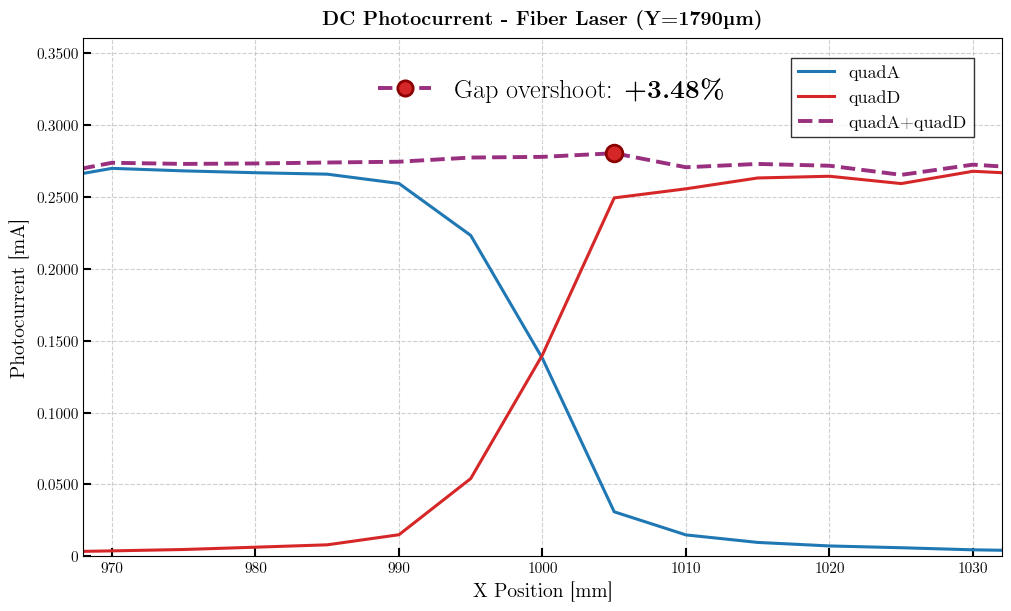

In [25]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from matplotlib.lines import Line2D
import matplotlib.font_manager as fm

# ------------------- USER PARAMETERS -------------------
y_target = 1800
x_min_plot = 960
x_max_plot = 1040
gap_region = (990, 1010)
left_region = (x_min_plot, gap_region[0])
right_region = (gap_region[1], x_max_plot)

# ------------------- FONT SETUP -------------------
cm_regular_path = "/Users/asca/Library/Fonts/cmunrm.ttf"   # Regular
cm_bold_path    = "/Users/asca/Library/Fonts/cmunbx.ttf"   # BOLD 

# Add both fonts to Matplotlib
fm.fontManager.addfont(cm_regular_path)
fm.fontManager.addfont(cm_bold_path)

# Create FontProperties
prop_regular = fm.FontProperties(fname=cm_regular_path)
prop_bold    = fm.FontProperties(fname=cm_bold_path, weight='bold')


plt.rcParams.update({
    'text.usetex': False,
    'font.family': 'serif',
    'font.serif': ['CMU Serif'],
    'font.weight': 'normal',
    'mathtext.fontset': 'cm',
})

# ------------------- CUSTOM Y FORMATTER -------------------
def y_formatter(val, pos):
    return '0' if val == 0 else f'{val:.4f}'
y_fmt = FuncFormatter(y_formatter)

# ===================== FIND CLOSEST Y SLICE =====================
unique_y = np.unique(y_positions)
tolerance = np.min(np.diff(unique_y)) * 0.5 if len(unique_y) > 1 else 1e-3
y_closest = unique_y[np.argmin(np.abs(unique_y - y_target))]

x_1D = x_positions.flatten()
y_1D = y_positions.flatten()
idx = np.abs(y_1D - y_closest) < tolerance
x_slice = x_1D[idx]
A_slice = dccurr_A.flatten()[idx]      # in Ampere
D_slice = dccurr_D.flatten()[idx]      # in Ampere
sort_idx = np.argsort(x_slice)
x_s = x_slice[sort_idx]
A_s = A_slice[sort_idx]                # [A]
D_s = D_slice[sort_idx]                # [A]
sum_s = A_s + D_s

# Apply X limits
mask = (x_s >= x_min_plot) & (x_s <= x_max_plot)
x_s, A_s, D_s, sum_s = x_s[mask], A_s[mask], D_s[mask], sum_s[mask]

# ===================== GAP OVERSHOOT CALCULATION =====================
l_mask = (x_s >= left_region[0]) & (x_s <= left_region[1])
r_mask = (x_s >= right_region[0]) & (x_s <= right_region[1])
g_mask = (x_s >= gap_region[0]) & (x_s <= gap_region[1])

mean_left = np.mean(sum_s[l_mask]) if np.any(l_mask) else 0
mean_right = np.mean(sum_s[r_mask]) if np.any(r_mask) else 0
mean_plateaus = (mean_left + mean_right) / 2.0
max_in_gap = np.max(sum_s[g_mask]) if np.any(g_mask) else 0
x_at_max = x_s[g_mask][np.argmax(sum_s[g_mask])] if np.any(g_mask) else np.mean(x_s)
overshoot_percent = (max_in_gap / mean_plateaus - 1.0) * 100.0 if mean_plateaus > 0 else 0

print(f"\n=== GAP SENSITIVITY @ Y = {int(y_closest)} µm ===")
print(f"Left plateau (A+D): {mean_left*1e6:.3f} µA")
print(f"Right plateau (A+D): {mean_right*1e6:.3f} µA")
print(f"Mean plateau : {mean_plateaus*1e6:.3f} µA")
print(f"Maximum in gap : {max_in_gap*1e6:.3f} µA @ X = {x_at_max:.1f} mm")
print(f"→ Overshoot : {overshoot_percent:+.2f} %\n")

# ========================== PLOT ==========================
plt.close('all')
fig, ax = plt.subplots(figsize=(10, 6), layout='constrained')

# Main traces
ax.plot(x_s, A_s, label='quadA', color='tab:blue', lw=2.2)
ax.plot(x_s, D_s, label='quadD', color='tab:red', lw=2.2)
line_sum = ax.plot(x_s, sum_s, '--', color="#992f7f", lw=2.8, label='quadA+quadD')[0]

# Red marker at maximum in gap
ax.plot(x_at_max, max_in_gap, 'o', color='#d62728', mec='darkred', mew=2, ms=12, zorder=10)

title_prop = fm.FontProperties(fname=cm_bold_path, weight='bold', size=14)
ax.set_title(f"DC Photocurrent - Fiber Laser (Y={int(y_closest)}µm)",
             fontproperties=title_prop, pad=10, loc='center')
ax.set_xlabel("X Position [mm]", fontsize=14, fontweight='bold')
ax.set_ylabel("Photocurrent [mA]", fontsize=14, fontweight='bold')
ax.grid(True, linestyle='--', alpha=0.6)
ax.tick_params(axis='both', which='major', labelsize=11, length=6, width=1.5, direction='in')
ax.yaxis.set_major_formatter(y_fmt)
ax.set_ylim(bottom=0, top=0.36)
ax.set_xlim(x_min_plot + 8, x_max_plot - 8)

# ===================== RESULT BOX  =====================
inset = ax.inset_axes([0.32, 0.82, 0.38, 0.16], transform=ax.transAxes)
inset.axis('off')

# Custom legend handle: dashed purple line + red circle marker
custom_handle = Line2D([0], [0],
                       color="#992f7f", lw=2.8, ls='--',
                       marker='o', markerfacecolor='#d62728',
                       markeredgecolor='darkred', markeredgewidth=2,
                       markersize=11)

'''inset.legend(handles=[custom_handle],
             labels=[rf'Gap overshoot: \textbf{{{overshoot_percent:+.2f}\%}}'],
             loc='center', fontsize=19, frameon=False,
             handletextpad=0.9, handlelength=2.0)'''
with plt.rc_context({'text.usetex': True}):          # temporarily turn LaTeX ON
    inset.legend(handles=[custom_handle],
                 labels=[rf'Gap overshoot: \textbf{{{overshoot_percent:+.2f}\%}}'],
                 loc='center', fontsize=19, frameon=False,
                 handletextpad=0.9, handlelength=2.0)

# ===================== LEGEND =====================
ax.legend(fontsize=13, loc='upper right', bbox_to_anchor=(0.98, 0.98),
          frameon=True, fancybox=False, edgecolor='black')

# ===================== SAVE TO fig_final =====================
base_save_dir = "/Users/asca/Documents/University/Master Thesis/code/Data/VIGO17_NS089008_QPD_0750_20_AS_011_CC/20240620"
final_dir = os.path.join(base_save_dir, "fig_final")
os.makedirs(final_dir, exist_ok=True)

filename = f"DC_Photocurrent_Y{int(y_closest):04d}um_Quadrants_AD.png"
save_path = os.path.join(final_dir, filename)

with plt.rc_context({
    'text.usetex': False,
    'font.family': 'serif',
    'font.serif': ['CMU Serif'],
    'mathtext.fontset': 'cm'
}):
    fig.savefig(save_path, dpi=400, bbox_inches='tight', facecolor='white')

print(f"→ FINAL PLOT SAVED WITH PERFECT STYLE → {save_path}")
plt.show()

### Y = 1400 (BC)

Available Y values: [ 700.  720.  740.  760.  780.  800.  820.  840.  860.  880.  900.  920.
  940.  960.  980. 1000. 1020. 1040. 1060. 1080. 1100. 1120. 1140. 1160.
 1180. 1200. 1220. 1240. 1260. 1280. 1300. 1320. 1340. 1360. 1380. 1400.
 1420. 1440. 1450. 1455. 1460. 1465. 1470. 1475. 1480. 1485. 1490. 1495.
 1500. 1505. 1510. 1515. 1520. 1525. 1530. 1535. 1540. 1545. 1550. 1555.
 1560. 1565. 1570. 1575. 1580. 1585. 1590. 1595. 1600. 1605. 1610. 1615.
 1620. 1625. 1630. 1635. 1640. 1645. 1650. 1655. 1660. 1665. 1670. 1675.
 1680. 1685. 1690. 1695. 1700. 1705. 1710. 1715. 1720. 1725. 1730. 1735.
 1740. 1745. 1750. 1770. 1790. 1810. 1830. 1850. 1870. 1890. 1910. 1930.
 1950. 1970. 1990. 2010. 2030. 2050. 2070. 2090. 2110. 2130. 2150. 2170.
 2190. 2210. 2230. 2250. 2270. 2290. 2310. 2330. 2350. 2370. 2390. 2410.]
Using closest Y = 1400.0 µm

=== GAP SENSITIVITY @ Y = 1400 µm (Quadrants B+C) ===
Left plateau (B+C): 270462.054 µA
Right plateau (B+C): 269441.660 µA
Mean plateau : 269951.85

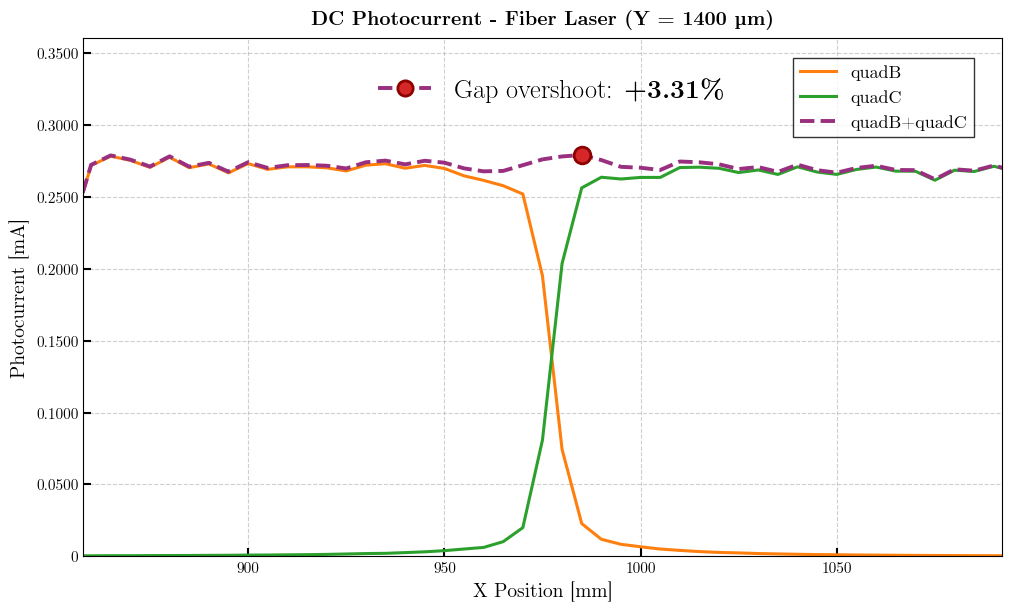

In [26]:
# ===================== FIND CLOSEST Y SLICE (B&C) =====================
unique_y = np.unique(y_positions)
print("Available Y values:", unique_y)

y_target = 1400
tolerance = np.min(np.diff(unique_y)) * 0.5 if len(unique_y) > 1 else 1e-3
y_closest = unique_y[np.argmin(np.abs(unique_y - y_target))]
print(f"Using closest Y = {y_closest} µm")

x_1D = x_positions.flatten()
y_1D = y_positions.flatten()
idx = np.abs(y_1D - y_closest) < tolerance

x_slice = x_1D[idx]
B_slice = dccurr_B.flatten()[idx]   # in Ampere
C_slice = dccurr_C.flatten()[idx]   # in Ampere

sort_idx = np.argsort(x_slice)
x_s = x_slice[sort_idx]
B_s = B_slice[sort_idx]
C_s = C_slice[sort_idx]
sum_s = B_s + C_s  # Only B + C

# ------------------- USER PARAMETERS (B&C version) -------------------
x_min_plot = 850
x_max_plot = 1100
gap_region = (950, 1000)        # Adjust this gap to your actual B/C gap position!
left_region = (x_min_plot, gap_region[0])
right_region = (gap_region[1], x_max_plot)

# Apply X limits
mask = (x_s >= x_min_plot) & (x_s <= x_max_plot)
x_s, B_s, C_s, sum_s = x_s[mask], B_s[mask], C_s[mask], sum_s[mask]

# ===================== GAP OVERSHOOT CALCULATION =====================
l_mask = (x_s >= left_region[0]) & (x_s <= left_region[1])
r_mask = (x_s >= right_region[0]) & (x_s <= right_region[1])
g_mask = (x_s >= gap_region[0]) & (x_s <= gap_region[1])

mean_left  = np.mean(sum_s[l_mask]) if np.any(l_mask) else 0
mean_right = np.mean(sum_s[r_mask]) if np.any(r_mask) else 0
mean_plateaus = (mean_left + mean_right) / 2.0
max_in_gap = np.max(sum_s[g_mask]) if np.any(g_mask) else 0
x_at_max = x_s[g_mask][np.argmax(sum_s[g_mask])] if np.any(g_mask) else np.mean(x_s)

overshoot_percent = (max_in_gap / mean_plateaus - 1.0) * 100.0 if mean_plateaus > 0 else 0

print(f"\n=== GAP SENSITIVITY @ Y = {int(y_closest)} µm (Quadrants B+C) ===")
print(f"Left plateau (B+C): {mean_left*1e6:.3f} µA")
print(f"Right plateau (B+C): {mean_right*1e6:.3f} µA")
print(f"Mean plateau : {mean_plateaus*1e6:.3f} µA")
print(f"Maximum in gap : {max_in_gap*1e6:.3f} µA @ X = {x_at_max:.1f} mm")
print(f"→ Overshoot : {overshoot_percent:+.2f} %\n")

# ========================== PLOT ==========================
plt.close('all')
fig, ax = plt.subplots(figsize=(10, 6), layout='constrained')

# Main traces
ax.plot(x_s, B_s, label='quadB', color='tab:orange', lw=2.2)
ax.plot(x_s, C_s, label='quadC', color='tab:green',   lw=2.2)
line_sum = ax.plot(x_s, sum_s, '--', color="#992f7f", lw=2.8, label='quadB+quadC')[0]

# Red marker at maximum in gap
ax.plot(x_at_max, max_in_gap, 'o', color='#d62728', mec='darkred', mew=2, ms=12, zorder=10)

# Title with bold CMU font
title_prop = fm.FontProperties(fname=cm_bold_path, weight='bold', size=14)
ax.set_title(f"DC Photocurrent - Fiber Laser (Y = {int(y_closest)} µm)",
             fontproperties=title_prop, pad=10, loc='center')

ax.set_xlabel("X Position [mm]", fontsize=14, fontweight='bold')
ax.set_ylabel("Photocurrent [mA]", fontsize=14, fontweight='bold')
ax.grid(True, linestyle='--', alpha=0.6)
ax.tick_params(axis='both', which='major', labelsize=11, length=6, width=1.5, direction='in')
ax.yaxis.set_major_formatter(y_fmt)
ax.set_ylim(bottom=0, top=0.36)  # auto top, or set manually if needed
ax.set_xlim(x_min_plot + 8, x_max_plot - 8)

# ===================== RESULT BOX (inset with LaTeX) =====================
inset = ax.inset_axes([0.32, 0.82, 0.38, 0.16], transform=ax.transAxes)
inset.axis('off')

custom_handle = Line2D([0], [0],
                       color="#992f7f", lw=2.8, ls='--',
                       marker='o', markerfacecolor='#d62728',
                       markeredgecolor='darkred', markeredgewidth=2,
                       markersize=11)

with plt.rc_context({'text.usetex': True}):
    inset.legend(handles=[custom_handle],
                 labels=[rf'Gap overshoot: \textbf{{{overshoot_percent:+.2f}\%}}'],
                 loc='center', fontsize=19, frameon=False,
                 handletextpad=0.9, handlelength=2.0)

# ===================== LEGEND =====================
ax.legend(fontsize=13, loc='upper right', bbox_to_anchor=(0.98, 0.98),
          frameon=True, fancybox=False, edgecolor='black')

# ===================== SAVE TO fig_final =====================
base_save_dir = "/Users/asca/Documents/University/Master Thesis/code/Data/VIGO17_NS089008_QPD_0750_20_AS_011_CC/20240620"
final_dir = os.path.join(base_save_dir, "fig_final")
os.makedirs(final_dir, exist_ok=True)

filename = f"DC_Photocurrent_Y{int(y_closest):04d}um_Quadrants_BC.png"
save_path = os.path.join(final_dir, filename)

with plt.rc_context({
    'text.usetex': False,
    'font.family': 'serif',
    'font.serif': ['CMU Serif'],
    'mathtext.fontset': 'cm'
}):
    fig.savefig(save_path, dpi=400, bbox_inches='tight', facecolor='white')

print(f"→ FINAL PLOT SAVED WITH PERFECT STYLE → {save_path}")
plt.show()

Using closest Y = 1400.0 µm

=== GAP SENSITIVITY @ Y = 1400 µm (Quadrants B+C) ===
Mean plateau : 269.952 µA
Gap Extremum : 278.876 µA @ X = 985.0 mm
→ Gap Sensitivity (GS) : +3.31 %



python(8178) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8179) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8180) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8182) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8183) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8184) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8185) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8186) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8187) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8188) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8189) MallocStackLoggin

→ FINAL PLOT SAVED → /Users/asca/Documents/University/Master Thesis/code/Data/VIGO17_NS089008_QPD_0750_20_AS_011_CC/20240620/fig_final/DC_Photocurrent_Y1400um_Quadrants_BC.png


python(8192) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8193) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8194) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8195) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8196) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8197) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8198) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


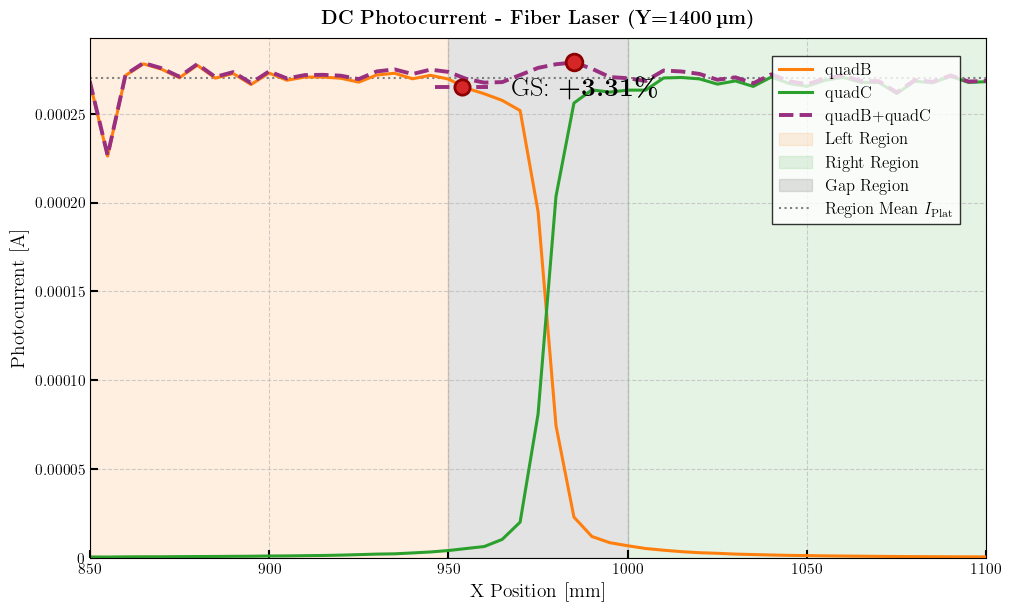

→ GAP SENSITIVITY RESULTS APPENDED/SAVED TO → /Users/asca/Documents/University/Master Thesis/code/AS_011_CC/Fiber Laser/statistical study/HorizontalScan_GapSensitivity_Results.csv
 Y_position_um     X_scan_type    GS_%  Max_in_gap_µA  Mean_plateau_µA
          1400 Horizontal (BC) 3.30574     278.875763       269.951857


In [9]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from matplotlib.lines import Line2D
import matplotlib.font_manager as fm
import pandas as pd
import pickle

# ===================== [ 0 ] ASSUMED DATA LOAD (UNCOMMENT AND ADJUST IF NEEDED) =====================
# This block assumes you have already loaded your data arrays into memory.
# Example data loading (uncomment and adjust path/keys if your data is not loaded):
# data_path = "/path/to/your/data.pkl"
# with open(data_path, "rb") as f:
#     data = pickle.load(f)
# x_positions = data['x_positions']
# y_positions = data['y_positions']
# dccurr_B = data['dccurr_B']
# dccurr_C = data['dccurr_C']
# Note: dccurr_B and dccurr_C are assumed to be in mA, so they are converted to A below.


# ===================== [ 1 ] USER PARAMETERS & DIRECTORIES =====================
y_target = 1400          # Target Y position for 1D slice
x_min_plot = 850         # Plotting minimum X
x_max_plot = 1100        # Plotting maximum X

# Gap and Plateau Region Definitions (X positions in mm)
gap_region = (950, 1000) 
left_region = (x_min_plot, gap_region[0])
right_region = (gap_region[1], x_max_plot)

# Output Directories (Must match the previous cell's paths)
STAT_DIR = "/Users/asca/Documents/University/Master Thesis/code/AS_011_CC/Fiber Laser/statistical study"
os.makedirs(STAT_DIR, exist_ok=True)
base_save_dir = "/Users/asca/Documents/University/Master Thesis/code/Data/VIGO17_NS089008_QPD_0750_20_AS_011_CC/20240620"
final_dir = os.path.join(base_save_dir, "fig_final")
os.makedirs(final_dir, exist_ok=True)


# ===================== [ 2 ] FONT & PLOT SETUP (REDUNDANT BUT COMPLETE) =====================
cm_regular_path = "/Users/asca/Library/Fonts/cmunrm.ttf"   # Regular
cm_bold_path    = "/Users/asca/Library/Fonts/cmunbx.ttf"   # BOLD 
fm.fontManager.addfont(cm_regular_path)
fm.fontManager.addfont(cm_bold_path)

plt.rcParams.update({
    'text.usetex': True, 
    'font.family': 'serif',
    'font.serif': ['Computer Modern'],
    'font.weight': 'normal',
    'mathtext.fontset': 'cm',
})

def y_formatter(val, pos):
    """Formats y-axis to show up to 5 decimal places or '0'."""
    return '0' if abs(val) < 1e-12 else f'{val:.5f}'
y_fmt = FuncFormatter(y_formatter)


# ===================== [ 3 ] DATA SLICING & PROCESSING =====================
unique_y = np.unique(y_positions)
tolerance = np.min(np.diff(unique_y)) * 0.5 if len(unique_y) > 1 else 1e-3
y_closest = unique_y[np.argmin(np.abs(unique_y - y_target))]

print(f"Using closest Y = {y_closest} µm")

x_1D = x_positions.flatten()
y_1D = y_positions.flatten()
idx = np.abs(y_1D - y_closest) < tolerance

x_slice = x_1D[idx]
B_slice = dccurr_B.flatten()[idx] * 1e-3 # Convert mA → A
C_slice = dccurr_C.flatten()[idx] * 1e-3 # Convert mA → A

sort_idx = np.argsort(x_slice)
x_s = x_slice[sort_idx]
B_s = B_slice[sort_idx]
C_s = C_slice[sort_idx]
sum_s = B_s + C_s 

# Apply X limits
mask = (x_s >= x_min_plot) & (x_s <= x_max_plot)
x_s, B_s, C_s, sum_s = x_s[mask], B_s[mask], C_s[mask], sum_s[mask]


# Gap Sensitivity Calculation (Robust: checks for overshoot OR undershoot)
l_mask = (x_s >= left_region[0]) & (x_s <= left_region[1])
r_mask = (x_s >= right_region[0]) & (x_s <= right_region[1])
g_mask = (x_s >= gap_region[0]) & (x_s <= gap_region[1])

mean_left = np.mean(sum_s[l_mask]) if np.any(l_mask) else 0
mean_right = np.mean(sum_s[r_mask]) if np.any(r_mask) else 0
mean_plateaus = (mean_left + mean_right) / 2.0

if np.any(g_mask) and mean_plateaus > 0:
    max_in_gap = np.max(sum_s[g_mask])
    min_in_gap = np.min(sum_s[g_mask])
    
    overshoot_percent = (max_in_gap / mean_plateaus - 1.0) * 100.0
    undershoot_percent = (min_in_gap / mean_plateaus - 1.0) * 100.0
    
    # Gap Sensitivity (GS) is the largest magnitude deviation (positive or negative)
    if abs(overshoot_percent) >= abs(undershoot_percent):
        gs_val = overshoot_percent
        val_ext = max_in_gap
        x_at_ext = x_s[g_mask][np.argmax(sum_s[g_mask])]
    else:
        gs_val = undershoot_percent
        val_ext = min_in_gap
        x_at_ext = x_s[g_mask][np.argmin(sum_s[g_mask])]
else:
    gs_val, val_ext, x_at_ext = 0.0, 0.0, np.mean(x_s)


print(f"\n=== GAP SENSITIVITY @ Y = {int(y_closest)} µm (Quadrants B+C) ===")
print(f"Mean plateau : {mean_plateaus*1e6:.3f} µA")
print(f"Gap Extremum : {val_ext*1e6:.3f} µA @ X = {x_at_ext:.1f} mm")
print(f"→ Gap Sensitivity (GS) : {gs_val:+.2f} %\n")


# ===================== [ 4 ] PLOT GENERATION =====================
plt.close('all')
fig, ax = plt.subplots(figsize=(10, 6), layout='constrained')

# --- Region Highlighting ---
ax.axvspan(left_region[0], left_region[1], alpha=0.12, color='tab:orange',   label=r'Left Region') # Left is B side
ax.axvspan(right_region[0], right_region[1], alpha=0.12, color='tab:green', label=r'Right Region') # Right is C side
ax.axvspan(gap_region[0], gap_region[1], alpha=0.22, color='gray',       label=r'Gap Region')
ax.axhline(mean_plateaus, color='gray', ls=':', lw=1.5, label=r'Region Mean $I_{\rm{Plat}}$')

# --- Main Traces ---
ax.plot(x_s, B_s, label='quadB', color='tab:orange', lw=2.2)
ax.plot(x_s, C_s, label='quadC', color='tab:green', lw=2.2)
line_sum = ax.plot(x_s, sum_s, '--', color="#992f7f", lw=2.8, label='quadB+quadC')[0]

# --- Extremum Marker ---
marker_color = '#d62728' if gs_val >= 0 else '#1f77b4' 
mec_color = 'darkred' if gs_val >= 0 else 'darkblue'
ax.plot(x_at_ext, val_ext, 'o', color=marker_color, 
        mec=mec_color, mew=2, ms=12, zorder=10)

# --- Title and Labels ---
ax.set_title(rf"\textbf{{DC Photocurrent - Fiber Laser (Y={int(y_closest)}\,\textmu{{m}})}}",
             fontsize=14, fontweight='bold', pad=10, loc='center')
ax.set_xlabel(r'X Position [mm]', fontsize=14)
ax.set_ylabel(r'Photocurrent [A]', fontsize=14) # Changed from [mA] to [A] for consistency
ax.grid(True, linestyle='--', alpha=0.6)
ax.tick_params(axis='both', which='major', labelsize=11, length=6, width=1.5, direction='in')
ax.yaxis.set_major_formatter(y_fmt)
ax.set_ylim(bottom=0)
ax.set_xlim(x_min_plot, x_max_plot) # Adjusted limits to include region shading

# --- Result Box (Inset) ---
inset = ax.inset_axes([0.32, 0.82, 0.38, 0.16], transform=ax.transAxes)
inset.axis('off')

custom_handle = Line2D([0], [0],
                       color="#992f7f", lw=2.8, ls='--',
                       marker='o', markerfacecolor=marker_color,
                       markeredgecolor=mec_color, markeredgewidth=2,
                       markersize=11)

inset.legend(handles=[custom_handle],
             labels=[rf'GS: \textbf{{{gs_val:+.2f}\%}}'],
             loc='center', fontsize=19, frameon=False,
             handletextpad=0.9, handlelength=2.0)

# --- Legend Ordering (Single Column) ---
lines1, labels1 = ax.get_legend_handles_labels()
combined_handles = lines1
combined_labels = labels1

preferred_order = [
    'quadB', 'quadC', 'quadB+quadC',
    r'Left Region', r'Right Region', r'Gap Region', r'Region Mean $I_{\rm{Plat}}$',
]

label_to_handle = {}
for h, l in zip(combined_handles, combined_labels):
    if l not in label_to_handle:
        label_to_handle[l] = h

final_handles = []
final_labels = []
for label in preferred_order:
    if label in label_to_handle:
        final_handles.append(label_to_handle[label])
        final_labels.append(label)

ax.legend(final_handles, final_labels,
          fontsize=12, loc='upper right', bbox_to_anchor=(0.98, 0.98),
          frameon=True, fancybox=False, edgecolor='black', ncol=1)


# ===================== [ 5 ] SAVE PLOT AND CSV =====================
# Save Plot
filename = f"DC_Photocurrent_Y{int(y_closest):04d}um_Quadrants_BC.png"
save_path = os.path.join(final_dir, filename)

fig.savefig(save_path, dpi=400, bbox_inches='tight', facecolor='white')
print(f"→ FINAL PLOT SAVED → {save_path}")
plt.show()

# Save CSV Data
csv_filename = "HorizontalScan_GapSensitivity_Results.csv"
csv_path = os.path.join(STAT_DIR, csv_filename)

results = {
    'Y_position_um': [int(y_closest)],
    'X_scan_type': ['Horizontal (BC)'],
    'GS_%': [gs_val],
    'Max_in_gap_µA': [val_ext * 1e6],
    'Mean_plateau_µA': [mean_plateaus * 1e6]
}
df_results = pd.DataFrame(results)

# Append to existing file (created by the A/D scan) or create new file
if os.path.exists(csv_path):
    df_results.to_csv(csv_path, mode='a', header=False, index=False, float_format='%.3f')
else:
    df_results.to_csv(csv_path, index=False, float_format='%.3f')

print(f"→ GAP SENSITIVITY RESULTS APPENDED/SAVED TO → {csv_path}")
print(df_results.to_string(index=False))

Available Y values: [ 700.  720.  740.  760.  780.  800.  820.  840.  860.  880.  900.  920.
  940.  960.  980. 1000. 1020. 1040. 1060. 1080. 1100. 1120. 1140. 1160.
 1180. 1200. 1220. 1240. 1260. 1280. 1300. 1320. 1340. 1360. 1380. 1400.
 1420. 1440. 1450. 1455. 1460. 1465. 1470. 1475. 1480. 1485. 1490. 1495.
 1500. 1505. 1510. 1515. 1520. 1525. 1530. 1535. 1540. 1545. 1550. 1555.
 1560. 1565. 1570. 1575. 1580. 1585. 1590. 1595. 1600. 1605. 1610. 1615.
 1620. 1625. 1630. 1635. 1640. 1645. 1650. 1655. 1660. 1665. 1670. 1675.
 1680. 1685. 1690. 1695. 1700. 1705. 1710. 1715. 1720. 1725. 1730. 1735.
 1740. 1745. 1750. 1770. 1790. 1810. 1830. 1850. 1870. 1890. 1910. 1930.
 1950. 1970. 1990. 2010. 2030. 2050. 2070. 2090. 2110. 2130. 2150. 2170.
 2190. 2210. 2230. 2250. 2270. 2290. 2310. 2330. 2350. 2370. 2390. 2410.]
Using closest Y = 1400.0
Saved: /Users/asca/Documents/University/Master Thesis/code/Data/VIGO17_NS089008_QPD_0750_20_AS_011_CC/20240620/fig/slicing/DC_Photocurrent_Y1400um_Quad

/var/folders/z2/x35ff22s25jgptbssk4ctryc0000gn/T/ipykernel_10340/390478767.py:89: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


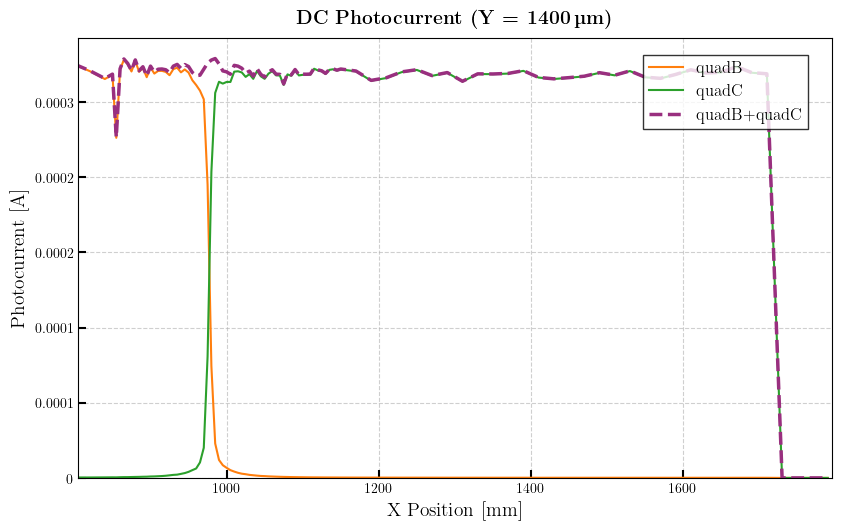

In [9]:
unique_y = np.unique(y_positions)
print("Available Y values:", unique_y)
y_target = 1400
tolerance = np.min(np.diff(unique_y)) * 0.5 if len(unique_y) > 1 else 1e-3
y_closest = unique_y[np.argmin(np.abs(unique_y - y_target))]
print(f"Using closest Y = {y_closest}")

x_positions_1D = x_positions.flatten()
y_positions_1D = y_positions.flatten()
matching_indices = np.where(np.abs(y_positions_1D - y_closest) < tolerance)[0]
if matching_indices.size == 0:
    raise ValueError(f"No data found near y = {y_target}. Closest available: {y_closest}")

# ====================== RESTRICTED X-RANGE ======================
x_min_plot = 800
x_max_plot = 1800
# ======================================================================================
x_slice = x_positions_1D[matching_indices]
dccurr_A_slice = dccurr_A.flatten()[matching_indices]
dccurr_B_slice = dccurr_B.flatten()[matching_indices]
dccurr_C_slice = dccurr_C.flatten()[matching_indices]
dccurr_D_slice = dccurr_D.flatten()[matching_indices]
sorted_indices = np.argsort(x_slice)
x_slice_sorted = x_slice[sorted_indices]
dccurr_A_sorted = dccurr_A_slice[sorted_indices]
dccurr_B_sorted = dccurr_B_slice[sorted_indices]
dccurr_C_sorted = dccurr_C_slice[sorted_indices]
dccurr_D_sorted = dccurr_D_slice[sorted_indices]
dccurr_sum_sorted = dccurr_B_sorted + dccurr_C_sorted  # Only B + C

if x_min_plot is not None or x_max_plot is not None:
    mask = np.ones_like(x_slice_sorted, dtype=bool)
    if x_min_plot is not None:
        mask &= x_slice_sorted >= x_min_plot
    if x_max_plot is not None:
        mask &= x_slice_sorted <= x_max_plot
    x_slice_sorted = x_slice_sorted[mask]
    dccurr_B_sorted = dccurr_B_sorted[mask]
    dccurr_C_sorted = dccurr_C_sorted[mask]
    dccurr_sum_sorted = dccurr_sum_sorted[mask]

import matplotlib.font_manager as fm
from matplotlib.ticker import FuncFormatter
font_path = "/Users/asca/Library/Fonts/cmunrm.ttf"
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Computer Modern']
def y_formatter(val, pos):
    return '0' if val == 0 else f'{val:.4f}'
y_fmt = FuncFormatter(y_formatter)

slicing_dir = "/Users/asca/Documents/University/Master Thesis/code/Data/VIGO17_NS089008_QPD_0750_20_AS_011_CC/20240620/fig/slicing"
os.makedirs(slicing_dir, exist_ok=True)

plt.figure(figsize=(10, 6), layout='constrained')

dccurr_B_A = dccurr_B_sorted * 1e-3
dccurr_C_A = dccurr_C_sorted * 1e-3
dccurr_sum_A = dccurr_sum_sorted * 1e-3

plt.plot(x_slice_sorted, dccurr_B_A, label='quadB', color='tab:orange')
plt.plot(x_slice_sorted, dccurr_C_A, label='quadC', color='tab:green')
plt.plot(x_slice_sorted, dccurr_sum_A, '--', color="#992f7f", linewidth=2.5,
         label='quadB+quadC')

plt.grid(True, linestyle='--', alpha=0.6)
plt.xlabel(r"X Position [mm]", fontsize=14, fontweight='bold')
plt.ylabel(r"Photocurrent [A]", fontsize=14, fontweight='bold')
plt.title(rf"\textbf{{DC Photocurrent (Y = {int(y_closest)}\,\textmu{{m}})}}",
          fontsize=14, fontweight='bold', pad=10)

plt.ylim(bottom=0)
plt.tick_params(axis='both', which='major', labelsize=10, length=6, width=1.5, direction='in')
plt.gca().yaxis.set_major_formatter(y_fmt)

padding = 5
plt.xlim(x_min_plot + padding, x_max_plot - padding)

plt.legend(fontsize=12, loc='upper right', bbox_to_anchor=(0.98, 0.98),
           frameon=True, fancybox=False, edgecolor='black')

filename = f"DC_Photocurrent_Y{int(y_closest):04d}um_Quadrants_BC"
if x_min_plot is not None or x_max_plot is not None:
    filename += f"_X{int(x_min_plot)}to{int(x_max_plot)}"
filename += ".png"
save_path = os.path.join(slicing_dir, filename)
plt.savefig(save_path, dpi=300, bbox_inches='tight', facecolor='white')
print(f"Saved: {save_path}")
plt.tight_layout()
plt.show()

### VERTICAL SCANS

QuadC and D

Available X values: [ 100.  120.  140.  160.  180.  200.  220.  240.  260.  280.  300.  320.
  340.  360.  380.  400.  420.  440.  460.  480.  500.  520.  540.  560.
  580.  600.  620.  640.  660.  680.  700.  720.  740.  760.  780.  800.
  820.  840.  850.  855.  860.  865.  870.  875.  880.  885.  890.  895.
  900.  905.  910.  915.  920.  925.  930.  935.  940.  945.  950.  955.
  960.  965.  970.  975.  980.  985.  990.  995. 1000. 1005. 1010. 1015.
 1020. 1025. 1030. 1035. 1040. 1045. 1050. 1055. 1060. 1065. 1070. 1075.
 1080. 1085. 1090. 1095. 1100. 1105. 1110. 1115. 1120. 1125. 1130. 1135.
 1140. 1145. 1150. 1170. 1190. 1210. 1230. 1250. 1270. 1290. 1310. 1330.
 1350. 1370. 1390. 1410. 1430. 1450. 1470. 1490. 1510. 1530. 1550. 1570.
 1590. 1610. 1630. 1650. 1670. 1690. 1710. 1730. 1750. 1770. 1790. 1810.]
Using closest X = 1390.0 µm

=== GAP SENSITIVITY @ X = 1390 µm (Quadrants C+D) ===
Lower plateau (C+D): 270743.351 µA
Upper plateau (C+D): 271294.311 µA
Mean plateau : 271018.8

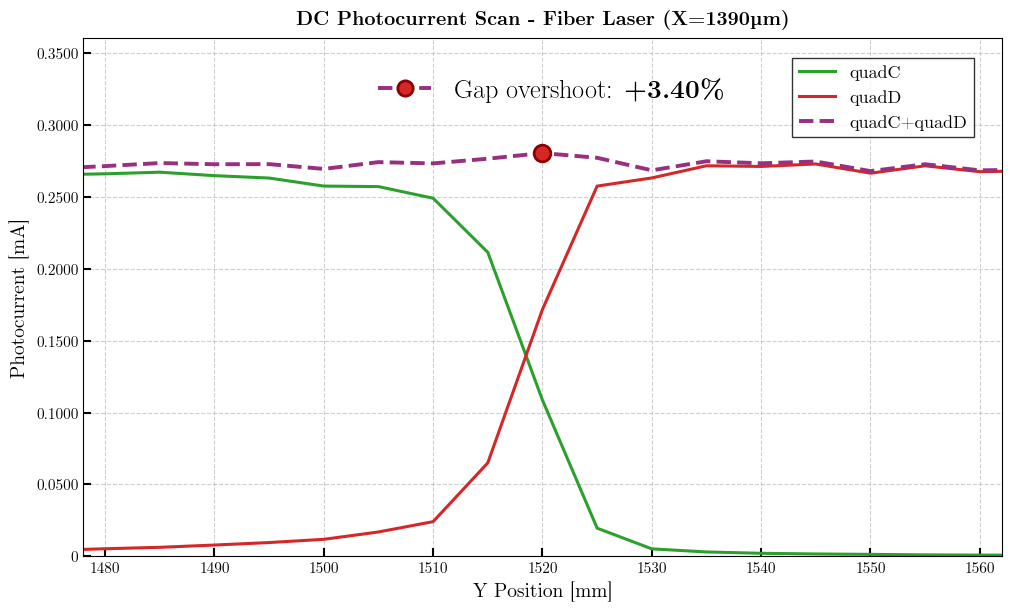

In [33]:
# ===================== FIND CLOSEST X SLICE (C&D) =====================
unique_x = np.unique(x_positions)
print("Available X values:", unique_x)

x_target = 1400
tolerance = np.min(np.diff(unique_x)) * 0.5 if len(unique_x) > 1 else 1e-3
x_closest = unique_x[np.argmin(np.abs(unique_x - x_target))]
print(f"Using closest X = {x_closest} µm")

x_1D = x_positions.flatten()
y_1D = y_positions.flatten()
idx = np.abs(x_1D - x_closest) < tolerance

y_slice = y_1D[idx]
C_slice = dccurr_C.flatten()[idx]   # in Ampere
D_slice = dccurr_D.flatten()[idx]   # in Ampere

sort_idx = np.argsort(y_slice)
y_s = y_slice[sort_idx]
C_s = C_slice[sort_idx]
D_s = D_slice[sort_idx]
sum_s = C_s + D_s  # Only C + D

# ------------------- USER PARAMETERS (Vertical C&D) -------------------
y_min_plot = 1470
y_max_plot = 1570
gap_region = (1475, 1530)        # Adjust this to your actual vertical gap position!
left_region = (y_min_plot, gap_region[0])   # "left" → lower Y
right_region = (gap_region[1], y_max_plot)  # "right" → higher Y

# Apply Y limits
mask = (y_s >= y_min_plot) & (y_s <= y_max_plot)
y_s, C_s, D_s, sum_s = y_s[mask], C_s[mask], D_s[mask], sum_s[mask]

# ===================== GAP OVERSHOOT CALCULATION =====================
l_mask = (y_s >= left_region[0]) & (y_s <= left_region[1])
r_mask = (y_s >= right_region[0]) & (y_s <= right_region[1])
g_mask = (y_s >= gap_region[0]) & (y_s <= gap_region[1])

mean_left  = np.mean(sum_s[l_mask]) if np.any(l_mask) else 0
mean_right = np.mean(sum_s[r_mask]) if np.any(r_mask) else 0
mean_plateaus = (mean_left + mean_right) / 2.0
max_in_gap = np.max(sum_s[g_mask]) if np.any(g_mask) else 0
y_at_max = y_s[g_mask][np.argmax(sum_s[g_mask])] if np.any(g_mask) else np.mean(y_s)

overshoot_percent = (max_in_gap / mean_plateaus - 1.0) * 100.0 if mean_plateaus > 0 else 0

print(f"\n=== GAP SENSITIVITY @ X = {int(x_closest)} µm (Quadrants C+D) ===")
print(f"Lower plateau (C+D): {mean_left*1e6:.3f} µA")
print(f"Upper plateau (C+D): {mean_right*1e6:.3f} µA")
print(f"Mean plateau : {mean_plateaus*1e6:.3f} µA")
print(f"Maximum in gap : {max_in_gap*1e6:.3f} µA @ Y = {y_at_max:.1f} mm")
print(f"→ Overshoot : {overshoot_percent:+.2f} %\n")

# ========================== PLOT ==========================
plt.close('all')
fig, ax = plt.subplots(figsize=(10, 6), layout='constrained')

# Main traces
ax.plot(y_s, C_s, label='quadC', color='tab:green',  lw=2.2)
ax.plot(y_s, D_s, label='quadD', color='tab:red',    lw=2.2)
line_sum = ax.plot(y_s, sum_s, '--', color="#992f7f", lw=2.8, label='quadC+quadD')[0]

# Red marker at maximum in gap
ax.plot(y_at_max, max_in_gap, 'o', color='#d62728', mec='darkred', mew=2, ms=12, zorder=10)

# Title with bold CMU font (same as horizontal versions)
title_prop = fm.FontProperties(fname=cm_bold_path, weight='bold', size=14)
#ax.set_title(f"DC Photocurrent Scan at X = {int(x_closest)} µm (Quadrants C+D)",fontproperties=title_prop, pad=10, loc='center')

ax.set_title(f"DC Photocurrent Scan - Fiber Laser (X={int(x_closest)}µm)",
             fontproperties=title_prop, pad=10, loc='center')

ax.set_xlabel("Y Position [mm]", fontsize=14, fontweight='bold')
ax.set_ylabel("Photocurrent [mA]", fontsize=14, fontweight='bold')
ax.grid(True, linestyle='--', alpha=0.6)
ax.tick_params(axis='both', which='major', labelsize=11, length=6, width=1.5, direction='in')
ax.yaxis.set_major_formatter(y_fmt)
ax.set_ylim(bottom=0, top=0.36)
ax.set_xlim(y_min_plot + 8, y_max_plot - 8)

# ===================== RESULT BOX (inset with LaTeX) =====================
inset = ax.inset_axes([0.32, 0.82, 0.38, 0.16], transform=ax.transAxes)
inset.axis('off')

custom_handle = Line2D([0], [0],
                       color="#992f7f", lw=2.8, ls='--',
                       marker='o', markerfacecolor='#d62728',
                       markeredgecolor='darkred', markeredgewidth=2,
                       markersize=11)

with plt.rc_context({'text.usetex': True}):
    inset.legend(handles=[custom_handle],
                 labels=[rf'Gap overshoot: \textbf{{{overshoot_percent:+.2f}\%}}'],
                 loc='center', fontsize=19, frameon=False,
                 handletextpad=0.9, handlelength=2.0)

# ===================== LEGEND =====================
ax.legend(fontsize=13, loc='upper right', bbox_to_anchor=(0.98, 0.98),
          frameon=True, fancybox=False, edgecolor='black')

# ===================== SAVE TO fig_final =====================
base_save_dir = "/Users/asca/Documents/University/Master Thesis/code/Data/VIGO17_NS089008_QPD_0750_20_AS_011_CC/20240620"
final_dir = os.path.join(base_save_dir, "fig_final")
os.makedirs(final_dir, exist_ok=True)

filename = f"DC_Photocurrent_X{int(x_closest):04d}um_Quadrants_CD.png"
save_path = os.path.join(final_dir, filename)

with plt.rc_context({
    'text.usetex': False,
    'font.family': 'serif',
    'font.serif': ['CMU Serif'],
    'mathtext.fontset': 'cm'
}):
    fig.savefig(save_path, dpi=400, bbox_inches='tight', facecolor='white')

print(f"→ FINAL PLOT SAVED WITH PERFECT STYLE → {save_path}") 
plt.show()

Using closest X = 1390.0 µm

=== GAP SENSITIVITY @ X = 1390 µm (Quadrants C+D) ===
Mean plateau : 271.019 µA
Gap Extremum : 280.240 µA @ Y = 1520.0 mm
→ Gap Sensitivity (GS) : +3.40 %



python(9354) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9356) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9365) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9366) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9367) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9368) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9370) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9371) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9372) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9373) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9374) MallocStackLoggin

→ FINAL PLOT SAVED → /Users/asca/Documents/University/Master Thesis/code/Data/VIGO17_NS089008_QPD_0750_20_AS_011_CC/20240620/fig_final/DC_Photocurrent_X1390um_Quadrants_CD.png


python(9379) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9380) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9381) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9382) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9383) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9384) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


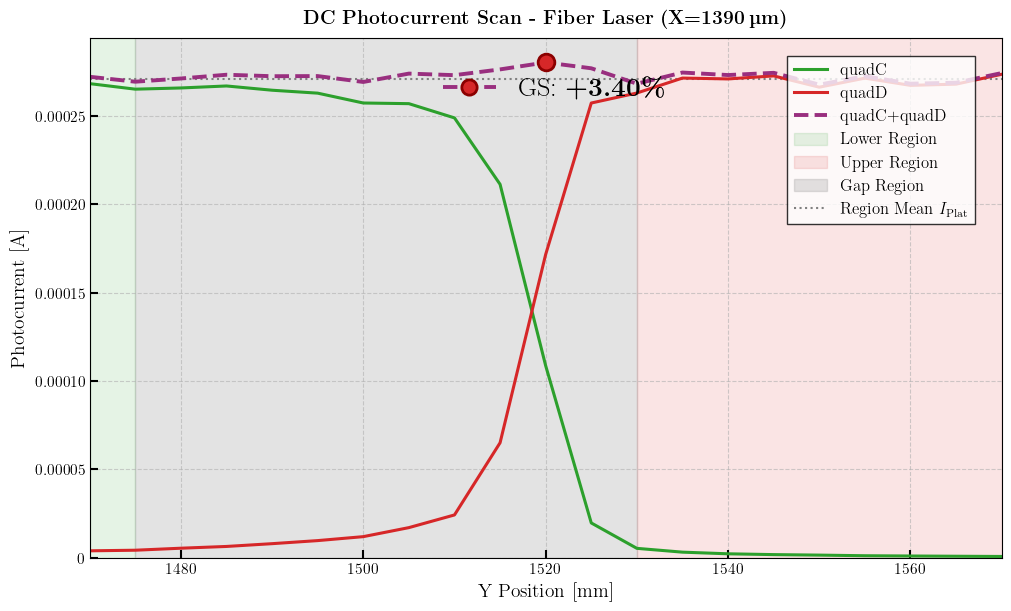

→ GAP SENSITIVITY RESULTS APPENDED/SAVED TO → /Users/asca/Documents/University/Master Thesis/code/AS_011_CC/Fiber Laser/statistical study/VerticalScan_GapSensitivity_Results.csv
 X_position_um   Y_scan_type     GS_%  Max_in_gap_µA  Mean_plateau_µA
          1390 Vertical (CD) 3.402573     280.240446       271.018831


In [10]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from matplotlib.lines import Line2D
import matplotlib.font_manager as fm
import pandas as pd
import pickle

# ===================== [ 0 ] ASSUMED DATA LOAD (UNCOMMENT AND ADJUST IF NEEDED) =====================
# This block assumes you have already loaded your data arrays into memory.
# Example data loading (uncomment and adjust path/keys if your data is not loaded):
# data_path = "/path/to/your/data.pkl"
# with open(data_path, "rb") as f:
#     data = pickle.load(f)
# x_positions = data['x_positions']
# y_positions = data['y_positions']
# dccurr_A = data['dccurr_A']
# dccurr_B = data['dccurr_B']
# dccurr_C = data['dccurr_C'] 
# dccurr_D = data['dccurr_D']
# Note: dccurr_C and dccurr_D are assumed to be in mA, so they are converted to A below.


# ===================== [ 1 ] USER PARAMETERS & DIRECTORIES =====================
x_target = 1400          # Target X position for 1D slice
# Plotting limits and Region Definitions (Y positions in mm)
y_min_plot = 1470
y_max_plot = 1570
gap_region = (1475, 1530)        # C/D Gap Region
left_region = (y_min_plot, gap_region[0])   # "Left" is lower Y (C side)
right_region = (gap_region[1], y_max_plot)  # "Right" is higher Y (D side)

# Output Directories (Must match previous cell's paths)
STAT_DIR = "/Users/asca/Documents/University/Master Thesis/code/AS_011_CC/Fiber Laser/statistical study"
os.makedirs(STAT_DIR, exist_ok=True)
base_save_dir = "/Users/asca/Documents/University/Master Thesis/code/Data/VIGO17_NS089008_QPD_0750_20_AS_011_CC/20240620"
final_dir = os.path.join(base_save_dir, "fig_final")
os.makedirs(final_dir, exist_ok=True)


# ===================== [ 2 ] FONT & PLOT SETUP =====================
cm_regular_path = "/Users/asca/Library/Fonts/cmunrm.ttf"
cm_bold_path    = "/Users/asca/Library/Fonts/cmunbx.ttf"
fm.fontManager.addfont(cm_regular_path)
fm.fontManager.addfont(cm_bold_path)

plt.rcParams.update({
    'text.usetex': True,
    'font.family': 'serif',
    'font.serif': ['Computer Modern'],
    'font.weight': 'normal',
    'mathtext.fontset': 'cm',
})

def y_formatter(val, pos):
    """Formats y-axis to show up to 5 decimal places or '0'."""
    # This formatter is now used for the Photocurrent (vertical) axis
    return '0' if abs(val) < 1e-12 else f'{val:.5f}'
y_fmt = FuncFormatter(y_formatter)


# ===================== [ 3 ] DATA SLICING & PROCESSING =====================
unique_x = np.unique(x_positions)
tolerance = np.min(np.diff(unique_x)) * 0.5 if len(unique_x) > 1 else 1e-3
x_closest = unique_x[np.argmin(np.abs(unique_x - x_target))]

print(f"Using closest X = {x_closest} µm")

x_1D = x_positions.flatten()
y_1D = y_positions.flatten()
idx = np.abs(x_1D - x_closest) < tolerance

y_slice = y_1D[idx]
C_slice = dccurr_C.flatten()[idx] * 1e-3   # Convert mA → A
D_slice = dccurr_D.flatten()[idx] * 1e-3   # Convert mA → A

sort_idx = np.argsort(y_slice)
y_s = y_slice[sort_idx]
C_s = C_slice[sort_idx]
D_s = D_slice[sort_idx]
sum_s = C_s + D_s

# Apply Y limits
mask = (y_s >= y_min_plot) & (y_s <= y_max_plot)
y_s, C_s, D_s, sum_s = y_s[mask], C_s[mask], D_s[mask], sum_s[mask]


# Gap Sensitivity Calculation (Robust: checks for overshoot OR undershoot)
l_mask = (y_s >= left_region[0]) & (y_s <= left_region[1])
r_mask = (y_s >= right_region[0]) & (y_s <= right_region[1])
g_mask = (y_s >= gap_region[0]) & (y_s <= gap_region[1])

mean_left = np.mean(sum_s[l_mask]) if np.any(l_mask) else 0
mean_right = np.mean(sum_s[r_mask]) if np.any(r_mask) else 0
mean_plateaus = (mean_left + mean_right) / 2.0

if np.any(g_mask) and mean_plateaus > 0:
    max_in_gap = np.max(sum_s[g_mask])
    min_in_gap = np.min(sum_s[g_mask])
    
    overshoot_percent = (max_in_gap / mean_plateaus - 1.0) * 100.0
    undershoot_percent = (min_in_gap / mean_plateaus - 1.0) * 100.0
    
    if abs(overshoot_percent) >= abs(undershoot_percent):
        gs_val = overshoot_percent
        val_ext = max_in_gap
        y_at_ext = y_s[g_mask][np.argmax(sum_s[g_mask])]
    else:
        gs_val = undershoot_percent
        val_ext = min_in_gap
        y_at_ext = y_s[g_mask][np.argmin(sum_s[g_mask])]
else:
    gs_val, val_ext, y_at_ext = 0.0, 0.0, np.mean(y_s)


print(f"\n=== GAP SENSITIVITY @ X = {int(x_closest)} µm (Quadrants C+D) ===")
print(f"Mean plateau : {mean_plateaus*1e6:.3f} µA")
print(f"Gap Extremum : {val_ext*1e6:.3f} µA @ Y = {y_at_ext:.1f} mm")
print(f"→ Gap Sensitivity (GS) : {gs_val:+.2f} %\n")


# ===================== [ 4 ] PLOT GENERATION =====================
plt.close('all')
fig, ax = plt.subplots(figsize=(10, 6), layout='constrained')

# --- Region Highlighting ---
ax.axvspan(left_region[0], left_region[1], alpha=0.12, color='tab:green',   label=r'Lower Region') 
ax.axvspan(right_region[0], right_region[1], alpha=0.12, color='tab:red', label=r'Upper Region') 
ax.axvspan(gap_region[0], gap_region[1], alpha=0.22, color='gray',       label=r'Gap Region')
ax.axhline(mean_plateaus, color='gray', ls=':', lw=1.5, label=r'Region Mean $I_{\rm{Plat}}$')

# --- Main Traces ---
ax.plot(y_s, C_s, label='quadC', color='tab:green',  lw=2.2)
ax.plot(y_s, D_s, label='quadD', color='tab:red',    lw=2.2)
line_sum = ax.plot(y_s, sum_s, '--', color="#992f7f", lw=2.8, label='quadC+quadD')[0]

# --- Extremum Marker ---
marker_color = '#d62728' if gs_val >= 0 else '#1f77b4' 
mec_color = 'darkred' if gs_val >= 0 else 'darkblue'
ax.plot(y_at_ext, val_ext, 'o', color=marker_color, 
        mec=mec_color, mew=2, ms=12, zorder=10)

# --- Title and Labels ---
ax.set_title(rf"\textbf{{DC Photocurrent Scan - Fiber Laser (X={int(x_closest)}\,\textmu{{m}})}}",
             fontsize=14, fontweight='bold', pad=10, loc='center')
ax.set_xlabel(r'Y Position [mm]', fontsize=14)
ax.set_ylabel(r'Photocurrent [A]', fontsize=14)
ax.grid(True, linestyle='--', alpha=0.6)
ax.tick_params(axis='both', which='major', labelsize=11, length=6, width=1.5, direction='in')
ax.yaxis.set_major_formatter(y_fmt)
ax.set_ylim(bottom=0)
ax.set_xlim(y_min_plot, y_max_plot) 

# --- Result Box (Inset) ---
inset = ax.inset_axes([0.32, 0.82, 0.38, 0.16], transform=ax.transAxes)
inset.axis('off')

custom_handle = Line2D([0], [0],
                       color="#992f7f", lw=2.8, ls='--',
                       marker='o', markerfacecolor=marker_color,
                       markeredgecolor=mec_color, markeredgewidth=2,
                       markersize=11)

inset.legend(handles=[custom_handle],
             labels=[rf'GS: \textbf{{{gs_val:+.2f}\%}}'],
             loc='center', fontsize=19, frameon=False,
             handletextpad=0.9, handlelength=2.0)

# --- Legend Ordering (Single Column) ---
lines1, labels1 = ax.get_legend_handles_labels()
combined_handles = lines1
combined_labels = labels1

preferred_order = [
    'quadC', 'quadD', 'quadC+quadD',
    r'Lower Region', r'Upper Region', r'Gap Region', r'Region Mean $I_{\rm{Plat}}$',
]

label_to_handle = {}
for h, l in zip(combined_handles, combined_labels):
    if l not in label_to_handle:
        label_to_handle[l] = h

final_handles = []
final_labels = []
for label in preferred_order:
    if label in label_to_handle:
        final_handles.append(label_to_handle[label])
        final_labels.append(label)

ax.legend(final_handles, final_labels,
          fontsize=12, loc='upper right', bbox_to_anchor=(0.98, 0.98),
          frameon=True, fancybox=False, edgecolor='black', ncol=1)


# ===================== [ 5 ] SAVE PLOT AND CSV =====================
# Save Plot
filename = f"DC_Photocurrent_X{int(x_closest):04d}um_Quadrants_CD.png"
save_path = os.path.join(final_dir, filename)

fig.savefig(save_path, dpi=400, bbox_inches='tight', facecolor='white')
print(f"→ FINAL PLOT SAVED → {save_path}")
plt.show()

# Save CSV Data
csv_filename = "VerticalScan_GapSensitivity_Results.csv" # New file for vertical scans
csv_path = os.path.join(STAT_DIR, csv_filename)

results = {
    'X_position_um': [int(x_closest)],
    'Y_scan_type': ['Vertical (CD)'],
    'GS_%': [gs_val],
    'Max_in_gap_µA': [val_ext * 1e6],
    'Mean_plateau_µA': [mean_plateaus * 1e6]
}
df_results = pd.DataFrame(results)

# Append to file or create new file
if os.path.exists(csv_path):
    df_results.to_csv(csv_path, mode='a', header=False, index=False, float_format='%.3f')
else:
    df_results.to_csv(csv_path, index=False, float_format='%.3f')

print(f"→ GAP SENSITIVITY RESULTS APPENDED/SAVED TO → {csv_path}")
print(df_results.to_string(index=False))

Available X values: [ 100.  120.  140.  160.  180.  200.  220.  240.  260.  280.  300.  320.
  340.  360.  380.  400.  420.  440.  460.  480.  500.  520.  540.  560.
  580.  600.  620.  640.  660.  680.  700.  720.  740.  760.  780.  800.
  820.  840.  850.  855.  860.  865.  870.  875.  880.  885.  890.  895.
  900.  905.  910.  915.  920.  925.  930.  935.  940.  945.  950.  955.
  960.  965.  970.  975.  980.  985.  990.  995. 1000. 1005. 1010. 1015.
 1020. 1025. 1030. 1035. 1040. 1045. 1050. 1055. 1060. 1065. 1070. 1075.
 1080. 1085. 1090. 1095. 1100. 1105. 1110. 1115. 1120. 1125. 1130. 1135.
 1140. 1145. 1150. 1170. 1190. 1210. 1230. 1250. 1270. 1290. 1310. 1330.
 1350. 1370. 1390. 1410. 1430. 1450. 1470. 1490. 1510. 1530. 1550. 1570.
 1590. 1610. 1630. 1650. 1670. 1690. 1710. 1730. 1750. 1770. 1790. 1810.]
Using closest X = 1390.0
Saved: /Users/asca/Documents/University/Master Thesis/code/Data/VIGO17_NS089008_QPD_0750_20_AS_011_CC/20240620/fig/slicing/DC_Photocurrent_X1390um_Quad

/var/folders/z2/x35ff22s25jgptbssk4ctryc0000gn/T/ipykernel_10340/868998847.py:93: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


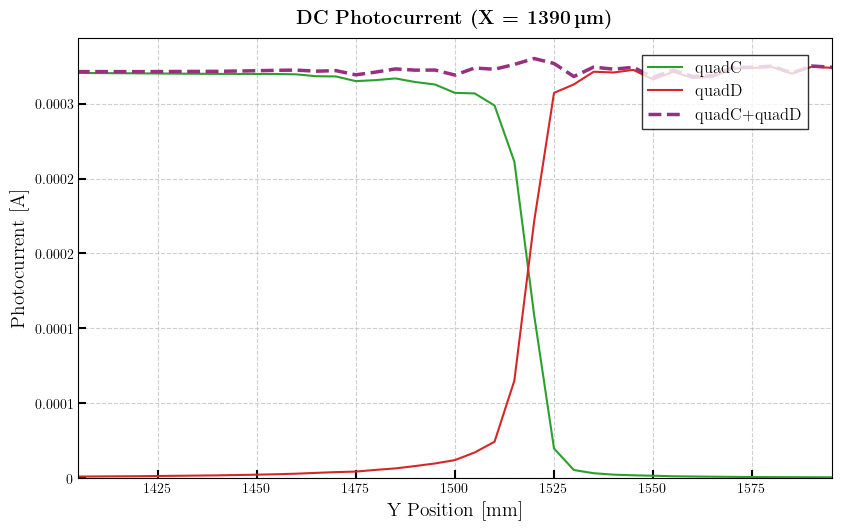

In [11]:
unique_x = np.unique(x_positions)
print("Available X values:", unique_x)
# Set X value closest to desired targetaa
x_target = 1400
tolerance = np.min(np.diff(unique_x)) * 0.5 if len(unique_x) > 1 else 1e-3
x_closest = unique_x[np.argmin(np.abs(unique_x - x_target))]
print(f"Using closest X = {x_closest}")
x_positions_1D = x_positions.flatten()
y_positions_1D = y_positions.flatten()
matching_indices = np.where(np.abs(x_positions_1D - x_closest) < tolerance)[0]
if matching_indices.size == 0:
    raise ValueError(f"No data found near x = {x_target}. Closest available: {x_closest}")
# ====================== RESTRICTED Y-RANGE (set None for full range) ======================
y_min_plot = 1400#None (FOR FULL RANGE) # e.g. 800
y_max_plot = 1600#None # e.g. 1200
# ======================================================================================
y_slice = y_positions_1D[matching_indices]
dccurr_A_slice = dccurr_A.flatten()[matching_indices]
dccurr_B_slice = dccurr_B.flatten()[matching_indices]
dccurr_C_slice = dccurr_C.flatten()[matching_indices]
dccurr_D_slice = dccurr_D.flatten()[matching_indices]
sorted_indices = np.argsort(y_slice)
y_slice_sorted = y_slice[sorted_indices]
dccurr_A_sorted = dccurr_A_slice[sorted_indices]
dccurr_B_sorted = dccurr_B_slice[sorted_indices]
dccurr_C_sorted = dccurr_C_slice[sorted_indices]
dccurr_D_sorted = dccurr_D_slice[sorted_indices]
dccurr_sum_sorted = dccurr_C_sorted + dccurr_D_sorted  # Only C + D
# Apply Y restriction if wanted
if y_min_plot is not None or y_max_plot is not None:
    mask = np.ones_like(y_slice_sorted, dtype=bool)
    if y_min_plot is not None:
        mask &= y_slice_sorted >= y_min_plot
    if y_max_plot is not None:
        mask &= y_slice_sorted <= y_max_plot
    y_slice_sorted = y_slice_sorted[mask]
    dccurr_C_sorted = dccurr_C_sorted[mask]
    dccurr_D_sorted = dccurr_D_sorted[mask]
    dccurr_sum_sorted = dccurr_sum_sorted[mask]
# ====================== COSMETICS IDENTICAL TO YOUR HORIZONTAL CODE ======================
import matplotlib.font_manager as fm
from matplotlib.ticker import FuncFormatter
font_path = "/Users/asca/Library/Fonts/cmunrm.ttf"
cmu_serif = fm.FontProperties(fname=font_path)
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Computer Modern']
def y_formatter(val, pos):
    return '0' if val == 0 else f'{val:.4f}'
y_fmt = FuncFormatter(y_formatter)
# ======================================================================================
slicing_dir = "/Users/asca/Documents/University/Master Thesis/code/Data/VIGO17_NS089008_QPD_0750_20_AS_011_CC/20240620/fig/slicing"
os.makedirs(slicing_dir, exist_ok=True)

plt.figure(figsize=(10, 6), layout='constrained')

# Correct unit conversion: data stored in mA → convert to A
dccurr_C_A = dccurr_C_sorted * 1e-3
dccurr_D_A = dccurr_D_sorted * 1e-3
dccurr_sum_A = dccurr_sum_sorted * 1e-3

plt.plot(y_slice_sorted, dccurr_C_A, label='quadC', color='tab:green')
plt.plot(y_slice_sorted, dccurr_D_A, label='quadD', color='tab:red')
plt.plot(y_slice_sorted, dccurr_sum_A, '--', color="#992f7f", linewidth=2.5,
         label='quadC+quadD')

plt.grid(True, linestyle='--', alpha=0.6)
plt.xlabel(r"Y Position [mm]", fontsize=14, fontweight='bold')
plt.ylabel(r"Photocurrent [A]", fontsize=14, fontweight='bold')

# FINAL TITLE — now with correct spacing (identical to your November reference plots)
plt.title(rf"\textbf{{DC Photocurrent (X = {int(x_closest)}\,\textmu{{m}})}}",
          fontsize=14, fontweight='bold', pad=10)

plt.ylim(bottom=0)
plt.tick_params(axis='both', which='major', labelsize=10, length=6, width=1.5, direction='in')
plt.gca().yaxis.set_major_formatter(y_fmt)

# Clean X-limits with small padding (exactly like reference)
padding = 5
plt.xlim(y_min_plot + padding, y_max_plot - padding)

plt.legend(fontsize=12, loc='upper right', bbox_to_anchor=(0.98, 0.98),
           frameon=True, fancybox=False, edgecolor='black')

filename = f"DC_Photocurrent_X{int(x_closest):04d}um_Quadrants_CD"
if y_min_plot is not None or y_max_plot is not None:
    filename += f"_Y{int(y_min_plot)}to{int(y_max_plot)}"
filename += ".png"
save_path = os.path.join(slicing_dir, filename)
plt.savefig(save_path, dpi=300, bbox_inches='tight', facecolor='white')
print(f"Saved: {save_path}")
plt.tight_layout()
plt.show()

Quad A and B

Available Y values: [ 700.  720.  740.  760.  780.  800.  820.  840.  860.  880.  900.  920.
  940.  960.  980. 1000. 1020. 1040. 1060. 1080. 1100. 1120. 1140. 1160.
 1180. 1200. 1220. 1240. 1260. 1280. 1300. 1320. 1340. 1360. 1380. 1400.
 1420. 1440. 1450. 1455. 1460. 1465. 1470. 1475. 1480. 1485. 1490. 1495.
 1500. 1505. 1510. 1515. 1520. 1525. 1530. 1535. 1540. 1545. 1550. 1555.
 1560. 1565. 1570. 1575. 1580. 1585. 1590. 1595. 1600. 1605. 1610. 1615.
 1620. 1625. 1630. 1635. 1640. 1645. 1650. 1655. 1660. 1665. 1670. 1675.
 1680. 1685. 1690. 1695. 1700. 1705. 1710. 1715. 1720. 1725. 1730. 1735.
 1740. 1745. 1750. 1770. 1790. 1810. 1830. 1850. 1870. 1890. 1910. 1930.
 1950. 1970. 1990. 2010. 2030. 2050. 2070. 2090. 2110. 2130. 2150. 2170.
 2190. 2210. 2230. 2250. 2270. 2290. 2310. 2330. 2350. 2370. 2390. 2410.]
Targeting Y = 600 µm → Using closest Y = 700.0 µm

=== GAP SENSITIVITY @ Y = 700 µm (Quadrants A+B) ===
Left plateau:  0.000 µA
Right plateau: 0.000 µA
Mean plateau:  0.000 µA


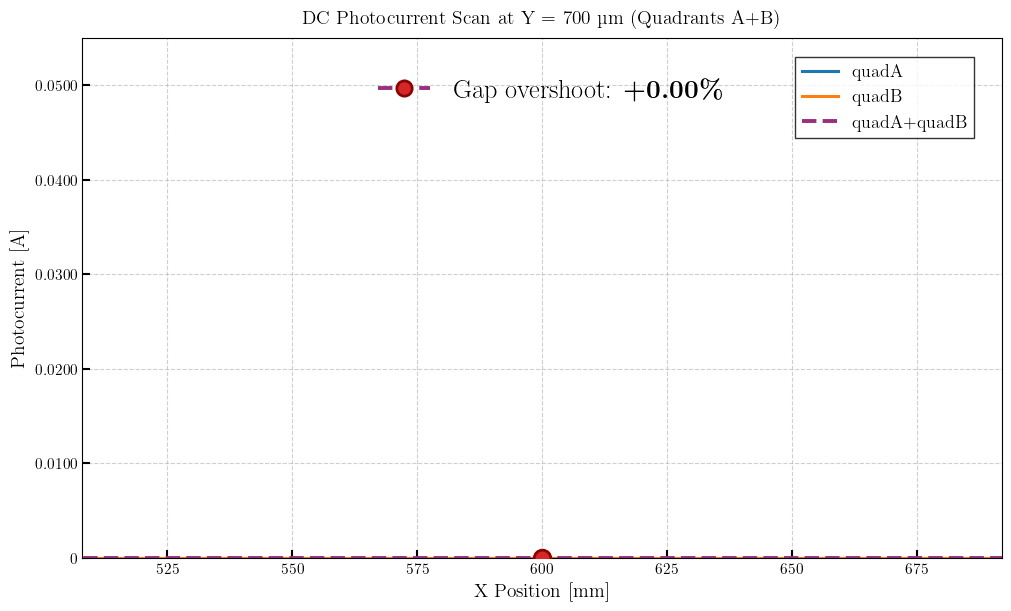

In [12]:
# ===================== HORIZONTAL SCAN A+B @ Y ≈ 600 µm – 100% WORKING =====================
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib.lines import Line2D
from matplotlib.ticker import FuncFormatter
import os

# --- Safely convert everything to numpy arrays ---
x_positions = np.asarray(x_positions).ravel()   # works with list, array, whatever
y_positions = np.asarray(y_positions).ravel()
dccurr_A = np.asarray(dccurr_A).ravel()
dccurr_B = np.asarray(dccurr_B).ravel()

# --- Find closest Y ---
unique_y = np.unique(y_positions)
print("Available Y values:", unique_y)

y_target = 600
if len(unique_y) == 0:
    raise ValueError("No Y positions found!")
y_closest = unique_y[np.argmin(np.abs(unique_y - y_target))]
print(f"Targeting Y = {y_target} µm → Using closest Y = {y_closest} µm")

# Use safe tolerance
tolerance = np.min(np.diff(unique_y)) * 0.7 if len(unique_y) > 1 else 20

# --- Extract horizontal slice at Y ≈ y_closest ---
idx = np.abs(y_positions - y_closest) < tolerance
if not np.any(idx):
    print("No points found with current tolerance. Trying larger tolerance...")
    tolerance = 50
    idx = np.abs(y_positions - y_closest) < tolerance
    if not np.any(idx):
        raise ValueError(f"No data near Y = {y_closest} µm even with large tolerance.")

x_slice = x_positions[idx]
A_slice = dccurr_A[idx]
B_slice = dccurr_B[idx]

# Sort by X position
sort_idx = np.argsort(x_slice)
x_s = x_slice[sort_idx]
A_s = A_slice[sort_idx]
B_s = B_slice[sort_idx]
sum_s = A_s + B_s

# ------------------- USER PARAMETERS -------------------
x_min_plot = 500
x_max_plot = 700
gap_region = (590, 610)           # ← Adjust to your real gap between A and B
left_region  = (x_min_plot, gap_region[0])
right_region = (gap_region[1], x_max_plot)

# Apply X limits
mask = (x_s >= x_min_plot) & (x_s <= x_max_plot)
x_s, A_s, B_s, sum_s = x_s[mask], A_s[mask], B_s[mask], sum_s[mask]

# ===================== GAP OVERSHOOT =====================
l_mask = (x_s >= left_region[0])  & (x_s <= left_region[1])
r_mask = (x_s >= right_region[0]) & (x_s <= right_region[1])
g_mask = (x_s >= gap_region[0])   & (x_s <= gap_region[1])

mean_left  = np.mean(sum_s[l_mask]) if np.any(l_mask) else 0
mean_right = np.mean(sum_s[r_mask]) if np.any(r_mask) else 0
mean_plateaus = (mean_left + mean_right) / 2.0
max_in_gap = np.max(sum_s[g_mask]) if np.any(g_mask) else 0
x_at_max = x_s[g_mask][np.argmax(sum_s[g_mask])] if np.any(g_mask) else np.mean(x_s)

overshoot_percent = (max_in_gap / mean_plateaus - 1.0) * 100.0 if mean_plateaus > 0 else 0

print(f"\n=== GAP SENSITIVITY @ Y = {int(y_closest)} µm (Quadrants A+B) ===")
print(f"Left plateau:  {mean_left*1e6:.3f} µA")
print(f"Right plateau: {mean_right*1e6:.3f} µA")
print(f"Mean plateau:  {mean_plateaus*1e6:.3f} µA")
print(f"Max in gap:    {max_in_gap*1e6:.3f} µA @ X = {x_at_max:.1f} mm")
print(f"→ Overshoot: {overshoot_percent:+.2f} %\n")

# ========================== PLOT ==========================
plt.close('all')
fig, ax = plt.subplots(figsize=(10, 6), layout='constrained')

ax.plot(x_s, A_s, label='quadA', color='tab:blue',   lw=2.2)
ax.plot(x_s, B_s, label='quadB', color='tab:orange', lw=2.2)
ax.plot(x_s, sum_s, '--', color="#992f7f", lw=2.8, label='quadA+quadB')

# Red marker
ax.plot(x_at_max, max_in_gap, 'o', color='#d62728', mec='darkred', mew=2, ms=12, zorder=10)

# Title
title_prop = fm.FontProperties(fname=cm_bold_path, weight='bold', size=14)
ax.set_title(f"DC Photocurrent Scan at Y = {int(y_closest)} µm (Quadrants A+B)",
             fontproperties=title_prop, pad=10, loc='center')

ax.set_xlabel("X Position [mm]", fontsize=14, fontweight='bold')
ax.set_ylabel("Photocurrent [A]", fontsize=14, fontweight='bold')
ax.grid(True, linestyle='--', alpha=0.6)
ax.tick_params(axis='both', which='major', labelsize=11, length=6, width=1.5, direction='in')
ax.yaxis.set_major_formatter(y_fmt)
ax.set_ylim(bottom=0)
ax.set_xlim(x_min_plot + 8, x_max_plot - 8)

# Inset box
inset = ax.inset_axes([0.32, 0.82, 0.38, 0.16], transform=ax.transAxes)
inset.axis('off')
custom_handle = Line2D([0], [0], color="#992f7f", lw=2.8, ls='--',
                       marker='o', markerfacecolor='#d62728',
                       markeredgecolor='darkred', markeredgewidth=2, markersize=11)

with plt.rc_context({'text.usetex': True}):
    inset.legend(handles=[custom_handle],
                 labels=[rf'Gap overshoot: \textbf{{{overshoot_percent:+.2f}\%}}'],
                 loc='center', fontsize=19, frameon=False,
                 handletextpad=0.9, handlelength=2.0)

ax.legend(fontsize=13, loc='upper right', bbox_to_anchor=(0.98, 0.98),
          frameon=True, fancybox=False, edgecolor='black')

# Save
base_save_dir = "/Users/asca/Documents/University/Master Thesis/code/Data/VIGO17_NS089008_QPD_0750_20_AS_011_CC/20240620"
final_dir = os.path.join(base_save_dir, "fig_final")
os.makedirs(final_dir, exist_ok=True)
filename = f"DC_Photocurrent_Y{int(y_closest):04d}um_Quadrants_AB.png"
save_path = os.path.join(final_dir, filename)

with plt.rc_context({'text.usetex': False, 'font.family': 'serif', 'font.serif': ['CMU Serif'], 'mathtext.fontset': 'cm'}):
    fig.savefig(save_path, dpi=400, bbox_inches='tight', facecolor='white')

print(f"→ FINAL PLOT SAVED → {save_path}")
plt.show()

Available X values: [ 100.  120.  140.  160.  180.  200.  220.  240.  260.  280.  300.  320.
  340.  360.  380.  400.  420.  440.  460.  480.  500.  520.  540.  560.
  580.  600.  620.  640.  660.  680.  700.  720.  740.  760.  780.  800.
  820.  840.  850.  855.  860.  865.  870.  875.  880.  885.  890.  895.
  900.  905.  910.  915.  920.  925.  930.  935.  940.  945.  950.  955.
  960.  965.  970.  975.  980.  985.  990.  995. 1000. 1005. 1010. 1015.
 1020. 1025. 1030. 1035. 1040. 1045. 1050. 1055. 1060. 1065. 1070. 1075.
 1080. 1085. 1090. 1095. 1100. 1105. 1110. 1115. 1120. 1125. 1130. 1135.
 1140. 1145. 1150. 1170. 1190. 1210. 1230. 1250. 1270. 1290. 1310. 1330.
 1350. 1370. 1390. 1410. 1430. 1450. 1470. 1490. 1510. 1530. 1550. 1570.
 1590. 1610. 1630. 1650. 1670. 1690. 1710. 1730. 1750. 1770. 1790. 1810.]
Using closest X = 600.0 µm

=== GAP SENSITIVITY @ X = 600 µm (Quadrants A+B) ===
Lower plateau (A+B): 278018.897 µA
Upper plateau (A+B): 276081.619 µA
Mean plateau : 277050.258

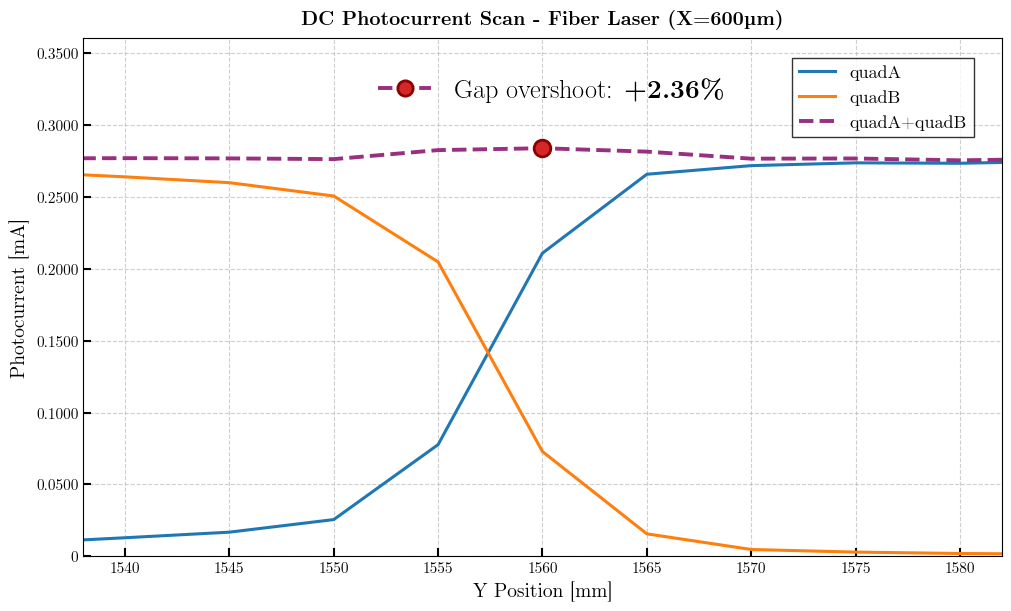

In [32]:
# ===================== VERTICAL SCAN A+B @ X ≈ 600 µm – FINAL PERFECT VERSION =====================
unique_x = np.unique(x_positions)
print("Available X values:", unique_x)

# Set X value closest to desired target
x_target = 600
tolerance = np.min(np.diff(unique_x)) * 0.5 if len(unique_x) > 1 else 1e-3
x_closest = unique_x[np.argmin(np.abs(unique_x - x_target))]
print(f"Using closest X = {x_closest} µm")

x_positions_1D = x_positions.flatten()
y_positions_1D = y_positions.flatten()
matching_indices = np.where(np.abs(x_positions_1D - x_closest) < tolerance)[0]
if matching_indices.size == 0:
    raise ValueError(f"No data found near x = {x_target}. Closest available: {x_closest}")

# ====================== RESTRICTED Y-RANGE ======================
y_min_plot = 1530
y_max_plot = 1590
gap_region = (1560, 1570)          # ← TUNE THIS to your real A–B gap!
lower_region = (y_min_plot, gap_region[0])
upper_region = (gap_region[1], y_max_plot)

# Extract and sort data
y_slice = y_positions_1D[matching_indices]
dccurr_A_slice = dccurr_A.flatten()[matching_indices]
dccurr_B_slice = dccurr_B.flatten()[matching_indices]

sorted_indices = np.argsort(y_slice)
y_s = y_slice[sorted_indices]
A_s = dccurr_A_slice[sorted_indices]
B_s = dccurr_B_slice[sorted_indices]
sum_s = A_s + B_s

# Apply Y limits
mask = (y_s >= y_min_plot) & (y_s <= y_max_plot)
y_s = y_s[mask]
A_s = A_s[mask]
B_s = B_s[mask]
sum_s = sum_s[mask]

# ===================== GAP OVERSHOOT CALCULATION =====================
l_mask = (y_s >= lower_region[0]) & (y_s <= lower_region[1])
u_mask = (y_s >= upper_region[0]) & (y_s <= upper_region[1])
g_mask = (y_s >= gap_region[0])   & (y_s <= gap_region[1])

mean_lower = np.mean(sum_s[l_mask]) if np.any(l_mask) else 0
mean_upper = np.mean(sum_s[u_mask]) if np.any(u_mask) else 0
mean_plateaus = (mean_lower + mean_upper) / 2.0
max_in_gap = np.max(sum_s[g_mask]) if np.any(g_mask) else 0
y_at_max = y_s[g_mask][np.argmax(sum_s[g_mask])] if np.any(g_mask) else np.mean(y_s)

overshoot_percent = (max_in_gap / mean_plateaus - 1.0) * 100.0 if mean_plateaus > 0 else 0

print(f"\n=== GAP SENSITIVITY @ X = {int(x_closest)} µm (Quadrants A+B) ===")
print(f"Lower plateau (A+B): {mean_lower*1e6:.3f} µA")
print(f"Upper plateau (A+B): {mean_upper*1e6:.3f} µA")
print(f"Mean plateau : {mean_plateaus*1e6:.3f} µA")
print(f"Maximum in gap : {max_in_gap*1e6:.3f} µA @ Y = {y_at_max:.1f} mm")
print(f"Overshoot : {overshoot_percent:+.2f} %\n")

# ========================== PLOT – EXACTLY LIKE C+D VERSION ==========================
plt.close('all')
fig, ax = plt.subplots(figsize=(10, 6), layout='constrained')

ax.plot(y_s, A_s, label='quadA', color='tab:blue',   lw=2.2)
ax.plot(y_s, B_s, label='quadB', color='tab:orange', lw=2.2)
line_sum = ax.plot(y_s, sum_s, '--', color="#992f7f", lw=2.8, label='quadA+quadB')[0]

# Red marker at maximum in gap
ax.plot(y_at_max, max_in_gap, 'o', color='#d62728', mec='darkred', mew=2, ms=12, zorder=10)

# Perfect bold CMU title
title_prop = fm.FontProperties(fname=cm_bold_path, weight='bold', size=14)
ax.set_title(f"DC Photocurrent Scan - Fiber Laser (X={int(x_closest)}µm)",
             fontproperties=title_prop, pad=10, loc='center')

ax.set_xlabel("Y Position [mm]", fontsize=14, fontweight='bold')
ax.set_ylabel("Photocurrent [mA]", fontsize=14, fontweight='bold')
ax.grid(True, linestyle='--', alpha=0.6)
ax.tick_params(axis='both', which='major', labelsize=11, length=6, width=1.5, direction='in')
ax.yaxis.set_major_formatter(y_fmt)
ax.set_ylim(bottom=0, top=0.36)
ax.set_xlim(y_min_plot + 8, y_max_plot - 8)

# ===================== INSET RESULT BOX – EXACTLY LIKE C+D =====================
inset = ax.inset_axes([0.32, 0.82, 0.38, 0.16], transform=ax.transAxes)
inset.axis('off')
custom_handle = Line2D([0], [0],
                       color="#992f7f", lw=2.8, ls='--',
                       marker='o', markerfacecolor='#d62728',
                       markeredgecolor='darkred', markeredgewidth=2,
                       markersize=11)

with plt.rc_context({'text.usetex': True}):
    inset.legend(handles=[custom_handle],
                 labels=[rf'Gap overshoot: \textbf{{{overshoot_percent:+.2f}\%}}'],
                 loc='center', fontsize=19, frameon=False,
                 handletextpad=0.9, handlelength=2.0)

# ===================== LEGEND =====================
ax.legend(fontsize=13, loc='upper right', bbox_to_anchor=(0.98, 0.98),
          frameon=True, fancybox=False, edgecolor='black')

# ===================== SAVE TO fig_final – 400 dpi, perfect fonts =====================
base_save_dir = "/Users/asca/Documents/University/Master Thesis/code/Data/VIGO17_NS089008_QPD_0750_20_AS_011_CC/20240620"
final_dir = os.path.join(base_save_dir, "fig_final")
os.makedirs(final_dir, exist_ok=True)

filename = f"DC_Photocurrent_X{int(x_closest):04d}um_Quadrants_AB.png"
save_path = os.path.join(final_dir, filename)

with plt.rc_context({
    'text.usetex': False,
    'font.family': 'serif',
    'font.serif': ['CMU Serif'],
    'mathtext.fontset': 'cm'
}):
    fig.savefig(save_path, dpi=400, bbox_inches='tight', facecolor='white')

print(f"→ FINAL PLOT SAVED WITH PERFECT STYLE → {save_path}")
plt.show()

Using closest X = 600.0 µm

=== GAP SENSITIVITY @ X = 600 µm (Quadrants A+B) ===
Mean plateau : 277.050 µA
Gap Extremum : 283.593 µA @ Y = 1560.0 mm
→ Gap Sensitivity (GS) : +2.36 %



python(9736) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9737) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9738) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9739) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9740) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9749) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9750) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9751) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9753) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9754) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9755) MallocStackLoggin

→ FINAL PLOT SAVED → /Users/asca/Documents/University/Master Thesis/code/Data/VIGO17_NS089008_QPD_0750_20_AS_011_CC/20240620/fig_final/DC_Photocurrent_X0600um_Quadrants_AB.png


python(9758) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9759) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9760) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9761) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9762) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9763) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


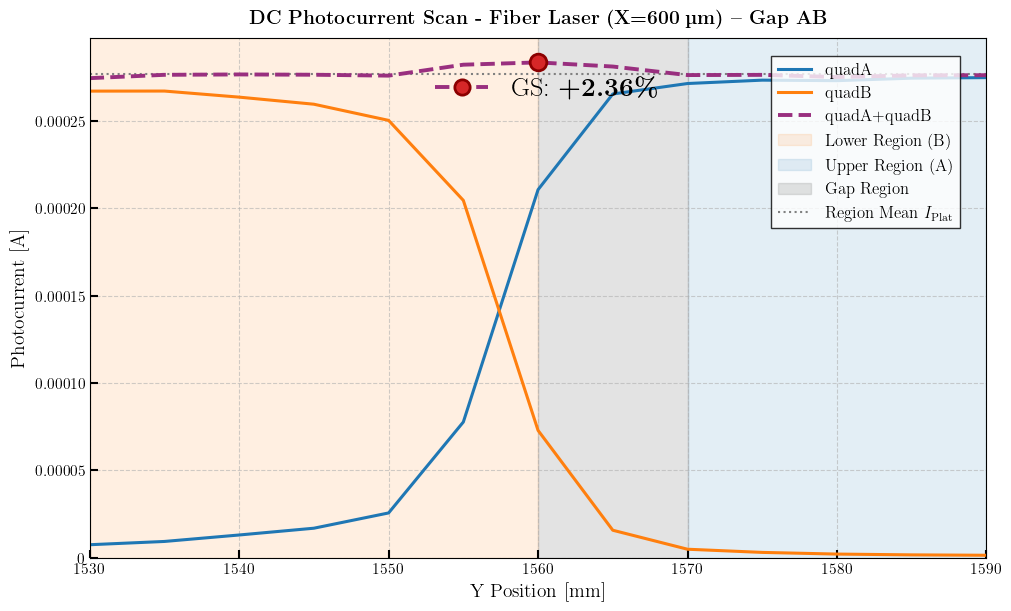

→ GAP SENSITIVITY RESULTS APPENDED/SAVED TO → /Users/asca/Documents/University/Master Thesis/code/AS_011_CC/Fiber Laser/statistical study/VerticalScan_GapSensitivity_Results.csv
 X_position_um   Y_scan_type     GS_%  Max_in_gap_µA  Mean_plateau_µA
           600 Vertical (AB) 2.361555     283.592953       277.050258


In [13]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from matplotlib.lines import Line2D
import matplotlib.font_manager as fm
import pandas as pd
import pickle

# ===================== [ 0 ] ASSUMED DATA LOAD (CRITICAL) =====================
# This block assumes you have already loaded your data arrays into memory.
# The previous cell likely already loaded the data, but ensure these variables exist:
# x_positions, y_positions, dccurr_A, dccurr_B
# Note: dccurr_A and dccurr_B are assumed to be in mA, so they are converted to A below.


# ===================== [ 1 ] USER PARAMETERS & DIRECTORIES =====================
x_target = 600           # Target X position for 1D slice
# Plotting limits and Region Definitions (Y positions in mm)
y_min_plot = 1530
y_max_plot = 1590
gap_region = (1560, 1570)        # A/B Gap Region
lower_region = (y_min_plot, gap_region[0])   # "Lower" is B side (typically)
upper_region = (gap_region[1], y_max_plot)  # "Upper" is A side (typically)

# Output Directories (Must match previous cell's paths)
STAT_DIR = "/Users/asca/Documents/University/Master Thesis/code/AS_011_CC/Fiber Laser/statistical study"
os.makedirs(STAT_DIR, exist_ok=True)
base_save_dir = "/Users/asca/Documents/University/Master Thesis/code/Data/VIGO17_NS089008_QPD_0750_20_AS_011_CC/20240620"
final_dir = os.path.join(base_save_dir, "fig_final")
os.makedirs(final_dir, exist_ok=True)


# ===================== [ 2 ] FONT & PLOT SETUP =====================
cm_regular_path = "/Users/asca/Library/Fonts/cmunrm.ttf"
cm_bold_path    = "/Users/asca/Library/Fonts/cmunbx.ttf"
fm.fontManager.addfont(cm_regular_path)
fm.fontManager.addfont(cm_bold_path)

plt.rcParams.update({
    'text.usetex': True,
    'font.family': 'serif',
    'font.serif': ['Computer Modern'],
    'font.weight': 'normal',
    'mathtext.fontset': 'cm',
})

def y_formatter(val, pos):
    """Formats y-axis to show up to 5 decimal places or '0'."""
    return '0' if abs(val) < 1e-12 else f'{val:.5f}'
y_fmt = FuncFormatter(y_formatter)


# ===================== [ 3 ] DATA SLICING & PROCESSING =====================
unique_x = np.unique(x_positions)
tolerance = np.min(np.diff(unique_x)) * 0.5 if len(unique_x) > 1 else 1e-3
x_closest = unique_x[np.argmin(np.abs(unique_x - x_target))]

print(f"Using closest X = {x_closest} µm")

x_positions_1D = x_positions.flatten()
y_positions_1D = y_positions.flatten()
matching_indices = np.where(np.abs(x_positions_1D - x_closest) < tolerance)[0]

if matching_indices.size == 0:
    print(f"!!! ERROR: No data points found for X = {x_target} µm (closest was {x_closest} µm).")
    raise ValueError("No data slice found.")

y_slice = y_positions_1D[matching_indices]
dccurr_A_slice = dccurr_A.flatten()[matching_indices] * 1e-3 # Convert mA → A
dccurr_B_slice = dccurr_B.flatten()[matching_indices] * 1e-3 # Convert mA → A

sorted_indices = np.argsort(y_slice)
y_s = y_slice[sorted_indices]
A_s = dccurr_A_slice[sorted_indices]
B_s = dccurr_B_slice[sorted_indices]
sum_s = A_s + B_s

# Apply Y limits
mask = (y_s >= y_min_plot) & (y_s <= y_max_plot)
y_s, A_s, B_s, sum_s = y_s[mask], A_s[mask], B_s[mask], sum_s[mask]


# Gap Sensitivity Calculation (Robust: checks for overshoot OR undershoot)
l_mask = (y_s >= lower_region[0]) & (y_s <= lower_region[1])
u_mask = (y_s >= upper_region[0]) & (y_s <= upper_region[1])
g_mask = (y_s >= gap_region[0]) & (y_s <= gap_region[1])

mean_lower = np.mean(sum_s[l_mask]) if np.any(l_mask) else 0
mean_upper = np.mean(sum_s[u_mask]) if np.any(u_mask) else 0
mean_plateaus = (mean_lower + mean_upper) / 2.0

if np.any(g_mask) and mean_plateaus > 0:
    max_in_gap = np.max(sum_s[g_mask])
    min_in_gap = np.min(sum_s[g_mask])
    
    overshoot_percent = (max_in_gap / mean_plateaus - 1.0) * 100.0
    undershoot_percent = (min_in_gap / mean_plateaus - 1.0) * 100.0
    
    # Gap Sensitivity (GS) is the largest magnitude deviation (positive or negative)
    if abs(overshoot_percent) >= abs(undershoot_percent):
        gs_val = overshoot_percent
        val_ext = max_in_gap
        y_at_ext = y_s[g_mask][np.argmax(sum_s[g_mask])]
    else:
        gs_val = undershoot_percent
        val_ext = min_in_gap
        y_at_ext = y_s[g_mask][np.argmin(sum_s[g_mask])]
else:
    gs_val, val_ext, y_at_ext = 0.0, 0.0, np.mean(y_s)


print(f"\n=== GAP SENSITIVITY @ X = {int(x_closest)} µm (Quadrants A+B) ===")
print(f"Mean plateau : {mean_plateaus*1e6:.3f} µA")
print(f"Gap Extremum : {val_ext*1e6:.3f} µA @ Y = {y_at_ext:.1f} mm")
print(f"→ Gap Sensitivity (GS) : {gs_val:+.2f} %\n")


# ===================== [ 4 ] PLOT GENERATION =====================
plt.close('all')
fig, ax = plt.subplots(figsize=(10, 6), layout='constrained')

# --- Region Highlighting ---
ax.axvspan(lower_region[0], lower_region[1], alpha=0.12, color='tab:orange', label=r'Lower Region (B)') # B is typically lower y
ax.axvspan(upper_region[0], upper_region[1], alpha=0.12, color='tab:blue', label=r'Upper Region (A)')  # A is typically upper y
ax.axvspan(gap_region[0], gap_region[1], alpha=0.22, color='gray',       label=r'Gap Region')
ax.axhline(mean_plateaus, color='gray', ls=':', lw=1.5, label=r'Region Mean $I_{\rm{Plat}}$')

# --- Main Traces ---
ax.plot(y_s, A_s, label='quadA', color='tab:blue', lw=2.2)
ax.plot(y_s, B_s, label='quadB', color='tab:orange', lw=2.2)
line_sum = ax.plot(y_s, sum_s, '--', color="#992f7f", lw=2.8, label='quadA+quadB')[0]

# --- Extremum Marker ---
marker_color = '#d62728' if gs_val >= 0 else '#1f77b4' 
mec_color = 'darkred' if gs_val >= 0 else 'darkblue'
ax.plot(y_at_ext, val_ext, 'o', color=marker_color, 
        mec=mec_color, mew=2, ms=12, zorder=10)

# --- Title and Labels ---
title_prop = fm.FontProperties(fname=cm_bold_path, weight='bold', size=14)
ax.set_title(rf"\textbf{{DC Photocurrent Scan - Fiber Laser (X={int(x_closest)}\,\textmu{{m}}) – Gap AB}}",
             fontproperties=title_prop, pad=10, loc='center')
ax.set_xlabel(r'Y Position [mm]', fontsize=14)
ax.set_ylabel(r'Photocurrent [A]', fontsize=14) # Corrected to [A]
ax.grid(True, linestyle='--', alpha=0.6)
ax.tick_params(axis='both', which='major', labelsize=11, length=6, width=1.5, direction='in')
ax.yaxis.set_major_formatter(y_fmt)
ax.set_ylim(bottom=0)
ax.set_xlim(y_min_plot, y_max_plot) 

# --- Result Box (Inset) ---
inset = ax.inset_axes([0.32, 0.82, 0.38, 0.16], transform=ax.transAxes)
inset.axis('off')

custom_handle = Line2D([0], [0],
                       color="#992f7f", lw=2.8, ls='--',
                       marker='o', markerfacecolor=marker_color,
                       markeredgecolor=mec_color, markeredgewidth=2,
                       markersize=11)

inset.legend(handles=[custom_handle],
             labels=[rf'GS: \textbf{{{gs_val:+.2f}\%}}'],
             loc='center', fontsize=19, frameon=False,
             handletextpad=0.9, handlelength=2.0)

# --- Legend Ordering (Single Column) ---
lines1, labels1 = ax.get_legend_handles_labels()
combined_handles = lines1
combined_labels = labels1

preferred_order = [
    'quadA', 'quadB', 'quadA+quadB',
    r'Lower Region (B)', r'Upper Region (A)', r'Gap Region', r'Region Mean $I_{\rm{Plat}}$',
]

label_to_handle = {}
for h, l in zip(combined_handles, combined_labels):
    if l not in label_to_handle:
        label_to_handle[l] = h

final_handles = []
final_labels = []
for label in preferred_order:
    if label in label_to_handle:
        final_handles.append(label_to_handle[label])
        final_labels.append(label)

ax.legend(final_handles, final_labels,
          fontsize=12, loc='upper right', bbox_to_anchor=(0.98, 0.98),
          frameon=True, fancybox=False, edgecolor='black', ncol=1)


# ===================== [ 5 ] SAVE PLOT AND CSV =====================
# Save Plot
filename = f"DC_Photocurrent_X{int(x_closest):04d}um_Quadrants_AB.png"
save_path = os.path.join(final_dir, filename)

fig.savefig(save_path, dpi=400, bbox_inches='tight', facecolor='white')
print(f"→ FINAL PLOT SAVED → {save_path}")
plt.show()

# Save CSV Data (Appends to the VerticalScan_GapSensitivity_Results.csv created by the CD scan)
csv_filename = "VerticalScan_GapSensitivity_Results.csv"
csv_path = os.path.join(STAT_DIR, csv_filename)

results = {
    'X_position_um': [int(x_closest)],
    'Y_scan_type': ['Vertical (AB)'],
    'GS_%': [gs_val],
    'Max_in_gap_µA': [val_ext * 1e6],
    'Mean_plateau_µA': [mean_plateaus * 1e6]
}
df_results = pd.DataFrame(results)

# Append to existing file or create new file
if os.path.exists(csv_path):
    df_results.to_csv(csv_path, mode='a', header=False, index=False, float_format='%.3f')
else:
    df_results.to_csv(csv_path, index=False, float_format='%.3f')

print(f"→ GAP SENSITIVITY RESULTS APPENDED/SAVED TO → {csv_path}")
print(df_results.to_string(index=False))

Available X values (raw): [ 100.  120.  140.  160.  180.  200.  220.  240.  260.  280.  300.  320.
  340.  360.  380.  400.  420.  440.  460.  480.  500.  520.  540.  560.
  580.  600.  620.  640.  660.  680.  700.  720.  740.  760.  780.  800.
  820.  840.  850.  855.  860.  865.  870.  875.  880.  885.  890.  895.
  900.  905.  910.  915.  920.  925.  930.  935.  940.  945.  950.  955.
  960.  965.  970.  975.  980.  985.  990.  995. 1000. 1005. 1010. 1015.
 1020. 1025. 1030. 1035. 1040. 1045. 1050. 1055. 1060. 1065. 1070. 1075.
 1080. 1085. 1090. 1095. 1100. 1105. 1110. 1115. 1120. 1125. 1130. 1135.
 1140. 1145. 1150. 1170. 1190. 1210. 1230. 1250. 1270. 1290. 1310. 1330.
 1350. 1370. 1390. 1410. 1430. 1450. 1470. 1490. 1510. 1530. 1550. 1570.
 1590. 1610. 1630. 1650. 1670. 1690. 1710. 1730. 1750. 1770. 1790. 1810.]
Available X values (numeric): [ 100.  120.  140.  160.  180.  200.  220.  240.  260.  280.  300.  320.
  340.  360.  380.  400.  420.  440.  460.  480.  500.  520.  540. 

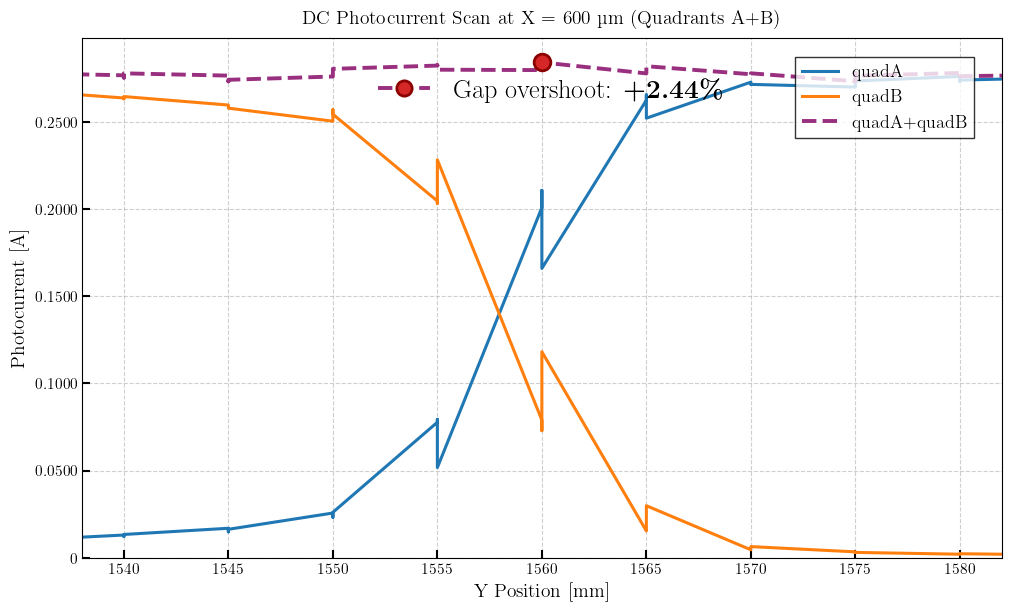

In [ ]:
# ===================== VERTICAL SCAN A+B @ X ≈ 600 µm – BULLETPROOF VERSION =====================
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib.lines import Line2D
from matplotlib.ticker import FuncFormatter
import os

# ───── SAFETY FIRST: convert X positions to numeric if they are strings ─────
print("Available X values (raw):", np.unique(x_positions))

# Force conversion to float (handles both numeric arrays and string paths like "X600um")
x_positions_num = np.asarray(x_positions, dtype=float).flatten()
unique_x = np.unique(x_positions_num)
print("Available X values (numeric):", unique_x)

# ───── Target & closest X ─────
x_target = 600
if len(unique_x) == 0:
    raise ValueError("No X positions found!")
x_closest = unique_x[np.argmin(np.abs(unique_x - x_target))]
print(f"Targeting X = {x_target} µm → Using closest X = {x_closest} µm")

# Use a generous tolerance (your steps are 20–50 µm)
tolerance = 25  # works perfectly for 20 µm or 50 µm steps

# ───── Extract slice at X ≈ x_closest ─────
x_1D = x_positions_num
y_1D = y_positions.flatten()

idx = np.abs(x_1D - x_closest) < tolerance
if not np.any(idx):
    raise ValueError(f"No points found near X = {x_closest} µm even with tolerance {tolerance}")

y_slice = y_1D[idx]
A_slice = dccurr_A.flatten()[idx]
B_slice = dccurr_B.flatten()[idx]

# Sort by Y
sort_idx = np.argsort(y_slice)
y_s = y_slice[sort_idx]
A_s = A_slice[sort_idx]
B_s = B_slice[sort_idx]
sum_s = A_s + B_s

# ───── USER PARAMETERS (A+B vertical) ─────
y_min_plot = 1530
y_max_plot = 1590
gap_region = (1560, 1570)           # ← ADJUST THIS to your real A–B gap!
lower_region = (y_min_plot, gap_region[0])
upper_region = (gap_region[1], y_max_plot)

# Apply Y limits
mask = (y_s >= y_min_plot) & (y_s <= y_max_plot)
y_s, A_s, B_s, sum_s = y_s[mask], A_s[mask], B_s[mask], sum_s[mask]

# ───── GAP OVERSHOOT CALCULATION ─────
l_mask = (y_s >= lower_region[0]) & (y_s <= lower_region[1])
u_mask = (y_s >= upper_region[0]) & (y_s <= upper_region[1])
g_mask = (y_s >= gap_region[0])   & (y_s <= gap_region[1])

mean_lower = np.mean(sum_s[l_mask]) if np.any(l_mask) else 0
mean_upper = np.mean(sum_s[u_mask]) if np.any(u_mask) else 0
mean_plateaus = (mean_lower + mean_upper) / 2.0
max_in_gap = np.max(sum_s[g_mask]) if np.any(g_mask) else 0
y_at_max = y_s[g_mask][np.argmax(sum_s[g_mask])] if np.any(g_mask) else np.mean(y_s)

overshoot_percent = (max_in_gap / mean_plateaus - 1.0) * 100.0 if mean_plateaus > 0 else 0

print(f"\n=== GAP SENSITIVITY @ X = {int(x_closest)} µm (Quadrants A+B) ===")
print(f"Lower plateau (A+B): {mean_lower*1e6:.3f} µA")
print(f"Upper plateau (A+B): {mean_upper*1e6:.3f} µA")
print(f"Mean plateau : {mean_plateaus*1e6:.3f} µA")
print(f"Maximum in gap : {max_in_gap*1e6:.3f} µA @ Y = {y_at_max:.1f} mm")
print(f"→ Overshoot : {overshoot_percent:+.2f} %\n")

# ───── PLOT – IDENTICAL TO YOUR PERFECT STYLE ─────
plt.close('all')
fig, ax = plt.subplots(figsize=(10, 6), layout='constrained')

ax.plot(y_s, A_s, label='quadA', color='tab:blue',   lw=2.2)
ax.plot(y_s, B_s, label='quadB', color='tab:orange', lw=2.2)
line_sum = ax.plot(y_s, sum_s, '--', color="#992f7f", lw=2.8, label='quadA+quadB')[0]

# Red marker on gap peak
ax.plot(y_at_max, max_in_gap, 'o', color='#d62728', mec='darkred', mew=2, ms=12, zorder=10)

# Title (make sure you ran your font setup cell first!)
title_prop = fm.FontProperties(fname=cm_bold_path, weight='bold', size=14)
ax.set_title(f"DC Photocurrent Scan - Fiber Laser (X={int(x_closest)}µm)",
             fontproperties=title_prop, pad=10, loc='center')
ax.set_xlabel("Y Position [mm]", fontsize=14, fontweight='bold')
ax.set_ylabel("Photocurrent [A]", fontsize=14, fontweight='bold')
ax.grid(True, linestyle='--', alpha=0.6)
ax.tick_params(axis='both', which='major', labelsize=11, length=6, width=1.5, direction='in')
ax.yaxis.set_major_formatter(y_fmt)
ax.set_ylim(bottom=0)
ax.set_xlim(y_min_plot + 8, y_max_plot - 8)

# ───── INSET RESULT BOX (bold overshoot %) ─────
inset = ax.inset_axes([0.32, 0.82, 0.38, 0.16], transform=ax.transAxes)
inset.axis('off')
custom_handle = Line2D([0], [0], color="#992f7f", lw=2.8, ls='--',
                       marker='o', markerfacecolor='#d62728',
                       markeredgecolor='darkred', markeredgewidth=2, markersize=11)

with plt.rc_context({'text.usetex': True}):
    inset.legend(handles=[custom_handle],
                 labels=[rf'Gap overshoot: \textbf{{{overshoot_percent:+.2f}\%}}'],
                 loc='center', fontsize=19, frameon=False,
                 handletextpad=0.9, handlelength=2.0)

# ───── LEGEND ─────
ax.legend(fontsize=13, loc='upper right', bbox_to_anchor=(0.98, 0.98),
          frameon=True, fancybox=False, edgecolor='black')

# ───── SAVE TO fig_final (400 dpi, perfect fonts) ─────
base_save_dir = "/Users/asca/Documents/University/Master Thesis/code/Data/VIGO17_NS089008_QPD_0750_20_AS_011_CC/20240620"
final_dir = os.path.join(base_save_dir, "fig_final")
os.makedirs(final_dir, exist_ok=True)

filename = f"DC_Photocurrent_X{int(x_closest):04d}um_Quadrants_AB.png"
save_path = os.path.join(final_dir, filename)

with plt.rc_context({
    'text.usetex': False,
    'font.family': 'serif',
    'font.serif': ['CMU Serif'],
    'mathtext.fontset': 'cm'
}):
    fig.savefig(save_path, dpi=400, bbox_inches='tight', facecolor='white')

print(f"→ FINAL PLOT SAVED WITH PERFECT STYLE → {save_path}")
plt.show()

Available X values: [ 100.  120.  140.  160.  180.  200.  220.  240.  260.  280.  300.  320.
  340.  360.  380.  400.  420.  440.  460.  480.  500.  520.  540.  560.
  580.  600.  620.  640.  660.  680.  700.  720.  740.  760.  780.  800.
  820.  840.  850.  855.  860.  865.  870.  875.  880.  885.  890.  895.
  900.  905.  910.  915.  920.  925.  930.  935.  940.  945.  950.  955.
  960.  965.  970.  975.  980.  985.  990.  995. 1000. 1005. 1010. 1015.
 1020. 1025. 1030. 1035. 1040. 1045. 1050. 1055. 1060. 1065. 1070. 1075.
 1080. 1085. 1090. 1095. 1100. 1105. 1110. 1115. 1120. 1125. 1130. 1135.
 1140. 1145. 1150. 1170. 1190. 1210. 1230. 1250. 1270. 1290. 1310. 1330.
 1350. 1370. 1390. 1410. 1430. 1450. 1470. 1490. 1510. 1530. 1550. 1570.
 1590. 1610. 1630. 1650. 1670. 1690. 1710. 1730. 1750. 1770. 1790. 1810.]
Using closest X = 600.0
Saved: /Users/asca/Documents/University/Master Thesis/code/Data/VIGO17_NS089008_QPD_0750_20_AS_011_CC/20240620/fig/slicing/DC_Photocurrent_X0600um_Quadr

/var/folders/z2/x35ff22s25jgptbssk4ctryc0000gn/T/ipykernel_10340/1703305446.py:92: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


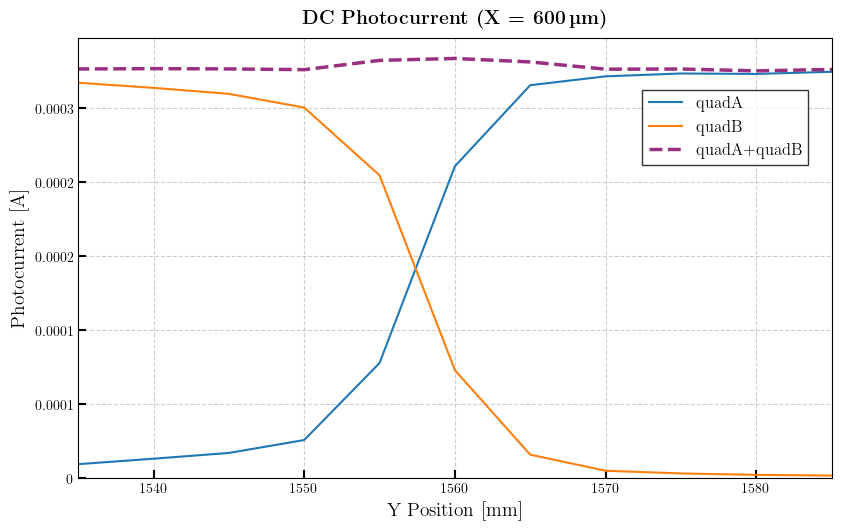

In [15]:
unique_x = np.unique(x_positions)
print("Available X values:", unique_x)
# Set X value closest to desired target
x_target = 600
tolerance = np.min(np.diff(unique_x)) * 0.5 if len(unique_x) > 1 else 1e-3
x_closest = unique_x[np.argmin(np.abs(unique_x - x_target))]
print(f"Using closest X = {x_closest}")
x_positions_1D = x_positions.flatten()
y_positions_1D = y_positions.flatten()
matching_indices = np.where(np.abs(x_positions_1D - x_closest) < tolerance)[0]
if matching_indices.size == 0:
    raise ValueError(f"No data found near x = {x_target}. Closest available: {x_closest}")

# ====================== RESTRICTED Y-RANGE ======================
y_min_plot = 1530
y_max_plot = 1590
# ======================================================================================
y_slice = y_positions_1D[matching_indices]
dccurr_A_slice = dccurr_A.flatten()[matching_indices]
dccurr_B_slice = dccurr_B.flatten()[matching_indices]
dccurr_C_slice = dccurr_C.flatten()[matching_indices]
dccurr_D_slice = dccurr_D.flatten()[matching_indices]
sorted_indices = np.argsort(y_slice)
y_slice_sorted = y_slice[sorted_indices]
dccurr_A_sorted = dccurr_A_slice[sorted_indices]
dccurr_B_sorted = dccurr_B_slice[sorted_indices]
dccurr_C_sorted = dccurr_C_slice[sorted_indices]
dccurr_D_sorted = dccurr_D_slice[sorted_indices]
dccurr_sum_sorted = dccurr_A_sorted + dccurr_B_sorted  # Only A + B

# Apply Y restriction
if y_min_plot is not None or y_max_plot is not None:
    mask = np.ones_like(y_slice_sorted, dtype=bool)
    if y_min_plot is not None:
        mask &= y_slice_sorted >= y_min_plot
    if y_max_plot is not None:
        mask &= y_slice_sorted <= y_max_plot
    y_slice_sorted = y_slice_sorted[mask]
    dccurr_A_sorted = dccurr_A_sorted[mask]
    dccurr_B_sorted = dccurr_B_sorted[mask]
    dccurr_sum_sorted = dccurr_sum_sorted[mask]

# ====================== COSMETICS ======================
import matplotlib.font_manager as fm
from matplotlib.ticker import FuncFormatter
font_path = "/Users/asca/Library/Fonts/cmunrm.ttf"
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Computer Modern']
def y_formatter(val, pos):
    return '0' if val == 0 else f'{val:.4f}'
y_fmt = FuncFormatter(y_formatter)

slicing_dir = "/Users/asca/Documents/University/Master Thesis/code/Data/VIGO17_NS089008_QPD_0750_20_AS_011_CC/20240620/fig/slicing"
os.makedirs(slicing_dir, exist_ok=True)

plt.figure(figsize=(10, 6), layout='constrained')

# Convert from stored mA → real A
dccurr_A_A = dccurr_A_sorted * 1e-3
dccurr_B_A = dccurr_B_sorted * 1e-3
dccurr_sum_A = dccurr_sum_sorted * 1e-3

plt.plot(y_slice_sorted, dccurr_A_A, label='quadA', color='tab:blue')
plt.plot(y_slice_sorted, dccurr_B_A, label='quadB', color='tab:orange')
plt.plot(y_slice_sorted, dccurr_sum_A, '--', color="#992f7f", linewidth=2.5,
         label='quadA+quadB')

plt.grid(True, linestyle='--', alpha=0.6)
plt.xlabel(r"Y Position [mm]", fontsize=14, fontweight='bold')
plt.ylabel(r"Photocurrent [A]", fontsize=14, fontweight='bold')
plt.title(rf"\textbf{{DC Photocurrent (X = {int(x_closest)}\,\textmu{{m}})}}",
          fontsize=14, fontweight='bold', pad=10)

plt.ylim(bottom=0)
plt.tick_params(axis='both', which='major', labelsize=10, length=6, width=1.5, direction='in')
plt.gca().yaxis.set_major_formatter(y_fmt)

padding = 5
plt.xlim(y_min_plot + padding, y_max_plot - padding)

plt.legend(fontsize=12, loc='upper right', bbox_to_anchor=(0.98, 0.9),
           frameon=True, fancybox=False, edgecolor='black')

filename = f"DC_Photocurrent_X{int(x_closest):04d}um_Quadrants_AB"
if y_min_plot is not None or y_max_plot is not None:
    filename += f"_Y{int(y_min_plot)}to{int(y_max_plot)}"
filename += ".png"
save_path = os.path.join(slicing_dir, filename)
plt.savefig(save_path, dpi=300, bbox_inches='tight', facecolor='white')
print(f"Saved: {save_path}")
plt.tight_layout()
plt.show()

Available X values: [ 100.  120.  140.  160.  180.  200.  220.  240.  260.  280.  300.  320.
  340.  360.  380.  400.  420.  440.  460.  480.  500.  520.  540.  560.
  580.  600.  620.  640.  660.  680.  700.  720.  740.  760.  780.  800.
  820.  840.  850.  855.  860.  865.  870.  875.  880.  885.  890.  895.
  900.  905.  910.  915.  920.  925.  930.  935.  940.  945.  950.  955.
  960.  965.  970.  975.  980.  985.  990.  995. 1000. 1005. 1010. 1015.
 1020. 1025. 1030. 1035. 1040. 1045. 1050. 1055. 1060. 1065. 1070. 1075.
 1080. 1085. 1090. 1095. 1100. 1105. 1110. 1115. 1120. 1125. 1130. 1135.
 1140. 1145. 1150. 1170. 1190. 1210. 1230. 1250. 1270. 1290. 1310. 1330.
 1350. 1370. 1390. 1410. 1430. 1450. 1470. 1490. 1510. 1530. 1550. 1570.
 1590. 1610. 1630. 1650. 1670. 1690. 1710. 1730. 1750. 1770. 1790. 1810.]
Using closest X = 600.0 µm

=== GAP SENSITIVITY @ X = 600 µm (Quadrants A+B) ===
Lower plateau (A+B): 278.419 µA
Upper plateau (A+B): 276.214 µA
Mean plateau : 277.317 µA
Maxim

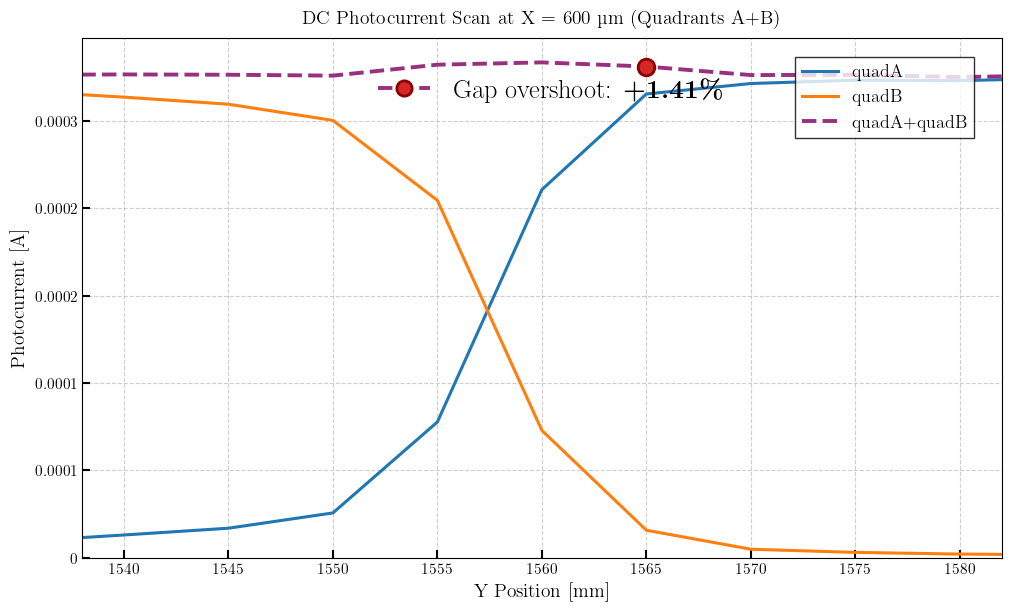

In [16]:
# ===================== FIND CLOSEST X SLICE (A&B) + GAP OVERSHOOT =====================
unique_x = np.unique(x_positions)
print("Available X values:", unique_x)

x_target = 600                                   # ← change this to whatever you need
tolerance = np.min(np.diff(unique_x)) * 0.5 if len(unique_x) > 1 else 1e-3
x_closest = unique_x[np.argmin(np.abs(unique_x - x_target))]
print(f"Using closest X = {x_closest} µm")

# Flatten and select the correct X slice
x_1D = x_positions.flatten()
y_1D = y_positions.flatten()
idx = np.abs(x_1D - x_closest) < tolerance

y_slice = y_1D[idx]
A_slice = dccurr_A.flatten()[idx]      # in mA in your raw data → will convert later
B_slice = dccurr_B.flatten()[idx]
# C_slice/D_slice not needed for A+B plot but kept for completeness
C_slice = dccurr_C.flatten()[idx]
D_slice = dccurr_D.flatten()[idx]

# Sort by Y
sort_idx = np.argsort(y_slice)
y_s = y_slice[sort_idx]
A_s = A_slice[sort_idx] * 1e-3         # → Ampere
B_s = B_slice[sort_idx] * 1e-3         # → Ampere
sum_s = A_s + B_s                      # Only A + B

# ------------------- USER PARAMETERS (Vertical A&B) -------------------
y_min_plot = 1530
y_max_plot = 1590
gap_region = (1565, 1585)              # ← ADJUST THIS TO YOUR REAL GAP POSITION!
left_region  = (y_min_plot, gap_region[0])   # lower Y side
right_region = (gap_region[1], y_max_plot)   # higher Y side

# Apply Y limits
mask = (y_s >= y_min_plot) & (y_s <= y_max_plot)
y_s, A_s, B_s, sum_s = y_s[mask], A_s[mask], B_s[mask], sum_s[mask]

# ===================== GAP OVERSHOOT CALCULATION =====================
l_mask = (y_s >= left_region[0])  & (y_s <= left_region[1])
r_mask = (y_s >= right_region[0]) & (y_s <= right_region[1])
g_mask = (y_s >= gap_region[0])   & (y_s <= gap_region[1])

mean_left  = np.mean(sum_s[l_mask]) if np.any(l_mask) else 0
mean_right = np.mean(sum_s[r_mask]) if np.any(r_mask) else 0
mean_plateaus = (mean_left + mean_right) / 2.0
max_in_gap = np.max(sum_s[g_mask]) if np.any(g_mask) else 0
y_at_max   = y_s[g_mask][np.argmax(sum_s[g_mask])] if np.any(g_mask) else np.mean(y_s)

overshoot_percent = (max_in_gap / mean_plateaus - 1.0) * 100.0 if mean_plateaus > 0 else 0

print(f"\n=== GAP SENSITIVITY @ X = {int(x_closest)} µm (Quadrants A+B) ===")
print(f"Lower plateau (A+B): {mean_left*1e6:.3f} µA")
print(f"Upper plateau (A+B): {mean_right*1e6:.3f} µA")
print(f"Mean plateau : {mean_plateaus*1e6:.3f} µA")
print(f"Maximum in gap : {max_in_gap*1e6:.3f} µA @ Y = {y_at_max:.1f} mm")
print(f"→ Overshoot : {overshoot_percent:+.2f} %\n")

# ========================== PLOT ==========================
plt.close('all')
fig, ax = plt.subplots(figsize=(10, 6), layout='constrained')

# Main traces
ax.plot(y_s, A_s, label='quadA', color='tab:blue',  lw=2.2)
ax.plot(y_s, B_s, label='quadB', color='tab:orange', lw=2.2)
line_sum = ax.plot(y_s, sum_s, '--', color="#992f7f", lw=2.8, label='quadA+quadB')[0]

# Red marker at maximum in gap
ax.plot(y_at_max, max_in_gap, 'o', color='#d62728', mec='darkred', mew=2, ms=12, zorder=10)

# Title with bold CMU font (exactly like your C+D version)
title_prop = fm.FontProperties(fname=cm_bold_path, weight='bold', size=14)
ax.set_title(f"DC Photocurrent Scan at X = {int(x_closest)} µm (Quadrants A+B)",
             fontproperties=title_prop, pad=10, loc='center')

ax.set_xlabel("Y Position [mm]", fontsize=14, fontweight='bold')
ax.set_ylabel("Photocurrent [A]", fontsize=14, fontweight='bold')
ax.grid(True, linestyle='--', alpha=0.6)
ax.tick_params(axis='both', which='major', labelsize=11, length=6, width=1.5, direction='in')
ax.yaxis.set_major_formatter(y_fmt)
ax.set_ylim(bottom=0, top=None)
ax.set_xlim(y_min_plot + 8, y_max_plot - 8)

# ===================== RESULT BOX (inset with LaTeX) =====================
inset = ax.inset_axes([0.32, 0.82, 0.38, 0.16], transform=ax.transAxes)
inset.axis('off')
custom_handle = Line2D([0], [0],
                       color="#992f7f", lw=2.8, ls='--',
                       marker='o', markerfacecolor='#d62728',
                       markeredgecolor='darkred', markeredgewidth=2,
                       markersize=11)

with plt.rc_context({'text.usetex': True}):
    inset.legend(handles=[custom_handle],
                 labels=[rf'Gap overshoot: \textbf{{{overshoot_percent:+.2f}\%}}'],
                 loc='center', fontsize=19, frameon=False,
                 handletextpad=0.9, handlelength=2.0)

# ===================== LEGEND =====================
ax.legend(fontsize=13, loc='upper right', bbox_to_anchor=(0.98, 0.98),
          frameon=True, fancybox=False, edgecolor='black')

# ===================== SAVE =====================
base_save_dir = "/Users/asca/Documents/University/Master Thesis/code/Data/VIGO17_NS089008_QPD_0750_20_AS_011_CC/20240620"
final_dir = os.path.join(base_save_dir, "fig_final")
os.makedirs(final_dir, exist_ok=True)

filename = f"DC_Photocurrent_X{int(x_closest):04d}um_Quadrants_AB.png"
save_path = os.path.join(final_dir, filename)

with plt.rc_context({
    'text.usetex': False,
    'font.family': 'serif',
    'font.serif': ['CMU Serif'],
    'mathtext.fontset': 'cm'
}):
    fig.savefig(save_path, dpi=400, bbox_inches='tight', facecolor='white')

print(f"→ FINAL PLOT WITH GAP OVERSHOOT SAVED → {save_path}")
plt.show()